## Telecom Churn Case Study
Telecom companies need to predict which customers are at high risk of churn for customer retention as it has now become even more important than customer acquisition.
We will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

## Reading and Understanding the Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing required packages
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import RFE
pd.set_option('display.max_info_columns', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_info_rows', 500)
telecom_churn = pd.read_csv('telecom_churn_data.csv')


In [3]:
print(telecom_churn)

       mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
0         7000842753        109             0.0             0.0   
1         7001865778        109             0.0             0.0   
2         7001625959        109             0.0             0.0   
3         7001204172        109             0.0             0.0   
4         7000142493        109             0.0             0.0   
...              ...        ...             ...             ...   
99994     7001548952        109             0.0             0.0   
99995     7000607688        109             0.0             0.0   
99996     7000087541        109             0.0             0.0   
99997     7000498689        109             0.0             0.0   
99998     7001905007        109             0.0             0.0   

       loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
0                 0.0            6/30/2014            7/31/2014   
1                 0.0            6/30/2014            7/31/20

#### Understanding the columns.

In [4]:
#Getting more information about each column
print(telecom_churn.info(verbose=True, null_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               99999 non-null int64
circle_id                   99999 non-null int64
loc_og_t2o_mou              98981 non-null float64
std_og_t2o_mou              98981 non-null float64
loc_ic_t2o_mou              98981 non-null float64
last_date_of_month_6        99999 non-null object
last_date_of_month_7        99398 non-null object
last_date_of_month_8        98899 non-null object
last_date_of_month_9        98340 non-null object
arpu_6                      99999 non-null float64
arpu_7                      99999 non-null float64
arpu_8                      99999 non-null float64
arpu_9                      99999 non-null float64
onnet_mou_6                 96062 non-null float64
onnet_mou_7                 96140 non-null float64
onnet_mou_8                 94621 non-null float64
onnet_mou_9                 92254 non-null float64
offnet_mou_6                960

None


# Data preparation

### Handling the missing data

In [5]:
# Replacing the na values with 0 for the below columns.

telecom_churn['total_rech_data_6'].fillna(0,inplace=True)
telecom_churn['total_rech_data_7'].fillna(0,inplace=True)
telecom_churn['total_rech_data_8'].fillna(0,inplace=True)
telecom_churn['total_rech_data_9'].fillna(0,inplace=True)
telecom_churn['av_rech_amt_data_6'].fillna(0,inplace=True)
telecom_churn['av_rech_amt_data_7'].fillna(0,inplace=True)
telecom_churn['av_rech_amt_data_8'].fillna(0,inplace=True)
telecom_churn['av_rech_amt_data_9'].fillna(0,inplace=True)

In [6]:
# Dropping the columns which have almost 80% missing data in the columns.
telecom_churn = telecom_churn.dropna(thresh=70000, axis=1)

In [7]:
print(telecom_churn.info(verbose=True, null_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 194 columns):
mobile_number           99999 non-null int64
circle_id               99999 non-null int64
loc_og_t2o_mou          98981 non-null float64
std_og_t2o_mou          98981 non-null float64
loc_ic_t2o_mou          98981 non-null float64
last_date_of_month_6    99999 non-null object
last_date_of_month_7    99398 non-null object
last_date_of_month_8    98899 non-null object
last_date_of_month_9    98340 non-null object
arpu_6                  99999 non-null float64
arpu_7                  99999 non-null float64
arpu_8                  99999 non-null float64
arpu_9                  99999 non-null float64
onnet_mou_6             96062 non-null float64
onnet_mou_7             96140 non-null float64
onnet_mou_8             94621 non-null float64
onnet_mou_9             92254 non-null float64
offnet_mou_6            96062 non-null float64
offnet_mou_7            96140 non-null float64
offne

In [8]:
# Dropping the dates related coulmns as they did not provide much useful information to predict the churn customers.
telecom_churn.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9'],axis=1,inplace=True)

In [9]:
print(telecom_churn.info(verbose=True, null_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 186 columns):
mobile_number         99999 non-null int64
circle_id             99999 non-null int64
loc_og_t2o_mou        98981 non-null float64
std_og_t2o_mou        98981 non-null float64
loc_ic_t2o_mou        98981 non-null float64
arpu_6                99999 non-null float64
arpu_7                99999 non-null float64
arpu_8                99999 non-null float64
arpu_9                99999 non-null float64
onnet_mou_6           96062 non-null float64
onnet_mou_7           96140 non-null float64
onnet_mou_8           94621 non-null float64
onnet_mou_9           92254 non-null float64
offnet_mou_6          96062 non-null float64
offnet_mou_7          96140 non-null float64
offnet_mou_8          94621 non-null float64
offnet_mou_9          92254 non-null float64
roam_ic_mou_6         96062 non-null float64
roam_ic_mou_7         96140 non-null float64
roam_ic_mou_8         94621 non-null fl

In [10]:
telecom_churn.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

In [11]:
telecom_churn.drop(['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou'],axis=1,inplace=True)

In [12]:
print(telecom_churn.info(verbose=True, null_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 183 columns):
mobile_number         99999 non-null int64
circle_id             99999 non-null int64
arpu_6                99999 non-null float64
arpu_7                99999 non-null float64
arpu_8                99999 non-null float64
arpu_9                99999 non-null float64
onnet_mou_6           96062 non-null float64
onnet_mou_7           96140 non-null float64
onnet_mou_8           94621 non-null float64
onnet_mou_9           92254 non-null float64
offnet_mou_6          96062 non-null float64
offnet_mou_7          96140 non-null float64
offnet_mou_8          94621 non-null float64
offnet_mou_9          92254 non-null float64
roam_ic_mou_6         96062 non-null float64
roam_ic_mou_7         96140 non-null float64
roam_ic_mou_8         94621 non-null float64
roam_ic_mou_9         92254 non-null float64
roam_og_mou_6         96062 non-null float64
roam_og_mou_7         96140 non-null fl

In [13]:
# List of coulms that we need to impute
columns_to_be_imputed=['onnet_mou_6','onnet_mou_7','onnet_mou_8','onnet_mou_9','offnet_mou_6','offnet_mou_7','offnet_mou_8','offnet_mou_9'
                      ,'roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','roam_ic_mou_9','loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8',
                       'loc_og_t2t_mou_9','loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8','loc_og_t2m_mou_9','loc_og_t2f_mou_6','loc_og_t2f_mou_7',
                      'loc_og_t2f_mou_8','loc_og_t2f_mou_9','loc_og_mou_6','loc_og_mou_7','loc_og_mou_8','loc_og_mou_9','std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8','std_og_t2t_mou_9'
                      ,'std_og_t2m_mou_6','std_og_t2m_mou_7','std_og_t2m_mou_8','std_og_t2m_mou_9','std_og_t2f_mou_6','std_og_t2f_mou_7','std_og_t2f_mou_8'
                      ,'std_og_t2f_mou_9','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_og_t2c_mou_9','std_og_mou_6','std_og_mou_7',
                      'std_og_mou_8','std_og_mou_9','isd_og_mou_6','isd_og_mou_7','isd_og_mou_8','isd_og_mou_9','spl_og_mou_6','spl_og_mou_7','spl_og_mou_8','spl_og_mou_9','og_others_6','og_others_7',
                       'og_others_8','og_others_9','loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8','loc_ic_t2t_mou_9',
                      'loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8','loc_ic_mou_9','std_ic_t2t_mou_6','std_ic_t2t_mou_7','std_ic_t2t_mou_8','std_ic_t2t_mou_9','std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8',
                      'std_ic_t2t_mou_9','std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8','std_ic_t2m_mou_9',
                      'std_ic_t2f_mou_6','std_ic_t2f_mou_7','std_ic_t2f_mou_8','std_ic_t2f_mou_9','std_ic_mou_6',
                      'std_ic_mou_7','std_ic_mou_8','std_ic_mou_9','spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8','spl_ic_mou_9',
                      'isd_ic_mou_6','isd_ic_mou_7','isd_ic_mou_8','isd_ic_mou_9','ic_others_6','ic_others_7','ic_others_8','ic_others_9',
                      ]

In [14]:
print(telecom_churn.info(verbose=True, null_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 183 columns):
mobile_number         99999 non-null int64
circle_id             99999 non-null int64
arpu_6                99999 non-null float64
arpu_7                99999 non-null float64
arpu_8                99999 non-null float64
arpu_9                99999 non-null float64
onnet_mou_6           96062 non-null float64
onnet_mou_7           96140 non-null float64
onnet_mou_8           94621 non-null float64
onnet_mou_9           92254 non-null float64
offnet_mou_6          96062 non-null float64
offnet_mou_7          96140 non-null float64
offnet_mou_8          94621 non-null float64
offnet_mou_9          92254 non-null float64
roam_ic_mou_6         96062 non-null float64
roam_ic_mou_7         96140 non-null float64
roam_ic_mou_8         94621 non-null float64
roam_ic_mou_9         92254 non-null float64
roam_og_mou_6         96062 non-null float64
roam_og_mou_7         96140 non-null fl

In [15]:
# Filling the na with the mean values for each column.

for column in columns_to_be_imputed: 
        mean = telecom_churn[column].mean()
        telecom_churn.fillna(mean,inplace=True)       
        

In [16]:
print(telecom_churn.info(verbose=True, null_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 183 columns):
mobile_number         99999 non-null int64
circle_id             99999 non-null int64
arpu_6                99999 non-null float64
arpu_7                99999 non-null float64
arpu_8                99999 non-null float64
arpu_9                99999 non-null float64
onnet_mou_6           99999 non-null float64
onnet_mou_7           99999 non-null float64
onnet_mou_8           99999 non-null float64
onnet_mou_9           99999 non-null float64
offnet_mou_6          99999 non-null float64
offnet_mou_7          99999 non-null float64
offnet_mou_8          99999 non-null float64
offnet_mou_9          99999 non-null float64
roam_ic_mou_6         99999 non-null float64
roam_ic_mou_7         99999 non-null float64
roam_ic_mou_8         99999 non-null float64
roam_ic_mou_9         99999 non-null float64
roam_og_mou_6         99999 non-null float64
roam_og_mou_7         99999 non-null fl

In [17]:
telecom_churn.describe()

mobile_number  circle_id        arpu_6        arpu_7        arpu_8  \
count   9.999900e+04    99999.0  99999.000000  99999.000000  99999.000000   
mean    7.001207e+09      109.0    282.987358    278.536648    279.154731   
std     6.956694e+05        0.0    328.439770    338.156291    344.474791   
min     7.000000e+09      109.0  -2258.709000  -2014.045000   -945.808000   
25%     7.000606e+09      109.0     93.411500     86.980500     84.126000   
50%     7.001205e+09      109.0    197.704000    191.640000    192.080000   
75%     7.001812e+09      109.0    371.060000    365.344500    369.370500   
max     7.002411e+09      109.0  27731.088000  35145.834000  33543.624000   

             arpu_9   onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  \
count  99999.000000  99999.000000  99999.000000  99999.000000  99999.000000   
mean     261.645069    132.395875    133.621605    132.984634    130.464474   
std      341.998630    291.298012    302.777325    300.528937    296.291434   
min    -1899.505000      0.000000      0.000000      0.000000      0.000000   
25%       62.685000      8.030000      7.290000      7.410000      6.630000   
50%      176.849000     37.960000     35.810000     37.160000     37.140000   
75%      353.466500    132.395875    132.395875    132.395875    132.395875   
max    38805.617000   7376.710000   8157.780000  10752.560000  10427.460000   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  \
count  99999.000000  99999.000000  99999.000000  99999.000000   99999.000000   
mean     195.355253    194.550293    193.123226    185.849620      14.770755   
std      310.813085    319.755863    318.580427    307.168705      75.244813   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%       36.720000     33.960000     34.510000     31.230000       0.000000   
50%      103.410000     98.530000    101.960000    101.290000       0.000000   
75%      222.535000    217.830000    215.500000    202.830000       0.000000   
max     8362.360000   9667.130000  14007.340000  10310.760000   13724.380000   

       roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  \
count   99999.000000   99999.000000   99999.000000   99999.000000   
mean       11.983189      14.021082      16.106668      18.576120   
std        75.950079      72.275215      64.398486      73.716528   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     15371.040000   13095.360000    8464.030000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  \
count   99999.000000   99999.000000   99999.000000      99999.000000   
mean       14.549031      16.555918      18.147050         50.458865   
std        61.989233      68.740655      65.164063        148.784476   
min         0.000000       0.000000       0.000000          0.000000   
25%         0.000000       0.000000       0.000000          1.910000   
50%         0.000000       0.000000       0.000000         13.240000   
75%         0.000000       0.000000       0.000000         48.040000   
max      2812.040000    5337.040000    4428.460000       6431.330000   

       loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  \
count      99999.000000      99999.000000      99999.000000      99999.000000   
mean          49.788806         50.540257         51.385509         94.879651   
std          153.188939        148.352349        144.073608        159.724644   
min            0.000000          0.000000          0.000000          0.000000   
25%            1.860000          1.950000          1.850000         10.760000   
50%           12.880000         13.580000         14.090000         44.710000   
75%           46.580000         50.110000 

### Deriving new features

In [18]:
# Deriving new column for getting the average recharge amout of customers for month of june and july.

telecom_churn['total_recharge_amount_6'] = (telecom_churn['av_rech_amt_data_6'] *telecom_churn['total_rech_data_6'])  + telecom_churn['total_rech_amt_6'] 
telecom_churn['total_recharge_amount_7'] = (telecom_churn['total_rech_data_7'] * telecom_churn['av_rech_amt_data_7']) + telecom_churn['total_rech_amt_7']
telecom_churn['average_recharge_amount'] = (telecom_churn['total_recharge_amount_6'] + telecom_churn['total_recharge_amount_7'])/2

In [19]:
perc =[.30, .70, 1.0]
telecom_churn.describe(percentiles = perc)

mobile_number  circle_id        arpu_6        arpu_7        arpu_8  \
count   9.999900e+04    99999.0  99999.000000  99999.000000  99999.000000   
mean    7.001207e+09      109.0    282.987358    278.536648    279.154731   
std     6.956694e+05        0.0    328.439770    338.156291    344.474791   
min     7.000000e+09      109.0  -2258.709000  -2014.045000   -945.808000   
30%     7.000726e+09      109.0    112.958400    105.690000    104.976000   
50%     7.001205e+09      109.0    197.704000    191.640000    192.080000   
70%     7.001690e+09      109.0    324.839400    317.910400    322.134600   
100%    7.002411e+09      109.0  27731.088000  35145.834000  33543.624000   
max     7.002411e+09      109.0  27731.088000  35145.834000  33543.624000   

             arpu_9   onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  \
count  99999.000000  99999.000000  99999.000000  99999.000000  99999.000000   
mean     261.645069    132.395875    133.621605    132.984634    130.464474   
std      341.998630    291.298012    302.777325    300.528937    296.291434   
min    -1899.505000      0.000000      0.000000      0.000000      0.000000   
30%       84.280000     12.010000     10.910000     11.380000     10.360000   
50%      176.849000     37.960000     35.810000     37.160000     37.140000   
70%      305.968400    106.040000    102.210000    109.290000    117.652000   
100%   38805.617000   7376.710000   8157.780000  10752.560000  10427.460000   
max    38805.617000   7376.710000   8157.780000  10752.560000  10427.460000   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  \
count  99999.000000  99999.000000  99999.000000  99999.000000   99999.000000   
mean     195.355253    194.550293    193.123226    185.849620      14.770755   
std      310.813085    319.755863    318.580427    307.168705      75.244813   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
30%       47.290000     44.234000     45.060000     42.110000       0.000000   
50%      103.410000     98.530000    101.960000    101.290000       0.000000   
70%      183.330000    179.080000    175.352000    164.190000       0.000000   
100%    8362.360000   9667.130000  14007.340000  10310.760000   13724.380000   
max     8362.360000   9667.130000  14007.340000  10310.760000   13724.380000   

       roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  \
count   99999.000000   99999.000000   99999.000000   99999.000000   
mean       11.983189      14.021082      16.106668      18.576120   
std        75.950079      72.275215      64.398486      73.716528   
min         0.000000       0.000000       0.000000       0.000000   
30%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
70%         0.000000       0.000000       0.000000       0.000000   
100%    15371.040000   13095.360000    8464.030000    3775.110000   
max     15371.040000   13095.360000    8464.030000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  \
count   99999.000000   99999.000000   99999.000000      99999.000000   
mean       14.549031      16.555918      18.147050         50.458865   
std        61.989233      68.740655      65.164063        148.784476   
min         0.000000       0.000000       0.000000          0.000000   
30%         0.000000       0.000000       0.000000          3.360000   
50%         0.000000       0.000000       0.000000         13.240000   
70%         0.000000       0.000000       0.000000         36.690000   
100%     2812.040000    5337.040000    4428.460000       6431.330000   
max      2812.040000    5337.040000    4428.460000       6431.330000   

       loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  \
count      99999.000000      99999.000000      99999.000000      99999.000000   
mean          49.788806         50.540257         51.385509         94

In [20]:
#Filter High value customers based on 70th percentile average recharge amount value
telecom_churn = telecom_churn.loc[telecom_churn['average_recharge_amount'] > 478]

#### We will now create a column 'churned' based on the columns values of 'total_og_mou_9','total_ic_mou_9', 'vol_2g_mb_9' and 'vol_3g_mb_9' where if the values are 0 then churned is 1 which predcts that the customer is churned else not churned.

In [21]:
# Churn the customers baseed
def churnOrNot(row):
    if(int(row['total_og_mou_9'])==0 & int(row['total_ic_mou_9'])==0 & int(row['vol_2g_mb_9'])==0 & int(row['vol_3g_mb_9'])==0):
        return 1
    else:
        return 0
telecom_churn['churned'] = telecom_churn.apply(churnOrNot, axis=1)

In [22]:
print(telecom_churn)

       mobile_number  circle_id    arpu_6    arpu_7    arpu_8   arpu_9  \
0         7000842753        109   197.385   214.816   213.803   21.100   
7         7000701601        109  1069.180  1349.850  3171.480  500.000   
8         7001524846        109   378.721   492.223   137.362  166.787   
21        7002124215        109   514.453   597.753   637.760  578.596   
23        7000887461        109    74.350   193.897   366.966  811.480   
...              ...        ...       ...       ...       ...      ...   
99981     7000630859        109   384.316   255.405   393.474   94.080   
99984     7000661676        109   328.594   202.966   118.707  324.143   
99986     7001729035        109   644.973   455.228   564.334  267.451   
99988     7002111859        109   312.558   512.932   402.080  533.502   
99997     7000498689        109   322.991   303.386   606.817  731.010   

       onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  \
0       132.395875   132.395875     

In [23]:
print(telecom_churn[telecom_churn['churned']==0])

       mobile_number  circle_id   arpu_6    arpu_7   arpu_8   arpu_9  \
8         7001524846        109  378.721   492.223  137.362  166.787   
21        7002124215        109  514.453   597.753  637.760  578.596   
23        7000887461        109   74.350   193.897  366.966  811.480   
33        7000149764        109  977.020  2362.833  409.230  799.356   
38        7000815202        109  363.987   486.558  393.909  391.709   
...              ...        ...      ...       ...      ...      ...   
99970     7001386760        109  261.269   410.614  290.851  330.963   
99981     7000630859        109  384.316   255.405  393.474   94.080   
99984     7000661676        109  328.594   202.966  118.707  324.143   
99986     7001729035        109  644.973   455.228  564.334  267.451   
99988     7002111859        109  312.558   512.932  402.080  533.502   

       onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  \
8           413.69       351.03        35.08        33.46   

In [24]:
# Dropping off the columns that are not required anymore for analysis.
telecom_churn.drop(['total_recharge_amount_6','total_recharge_amount_7','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8'
                   ,'total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_amt_6','total_rech_amt_7','total_rech_amt_8'],inplace=True,axis=1)

In [25]:
print(telecom_churn)

       mobile_number  circle_id    arpu_6    arpu_7    arpu_8   arpu_9  \
0         7000842753        109   197.385   214.816   213.803   21.100   
7         7000701601        109  1069.180  1349.850  3171.480  500.000   
8         7001524846        109   378.721   492.223   137.362  166.787   
21        7002124215        109   514.453   597.753   637.760  578.596   
23        7000887461        109    74.350   193.897   366.966  811.480   
...              ...        ...       ...       ...       ...      ...   
99981     7000630859        109   384.316   255.405   393.474   94.080   
99984     7000661676        109   328.594   202.966   118.707  324.143   
99986     7001729035        109   644.973   455.228   564.334  267.451   
99988     7002111859        109   312.558   512.932   402.080  533.502   
99997     7000498689        109   322.991   303.386   606.817  731.010   

       onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  \
0       132.395875   132.395875     

In [26]:
# Dropping the columns which have information on the 9th month as we have already derived the information from those columns.
telecom_churn.drop(telecom_churn.columns[telecom_churn.columns.str.contains('_9')], axis=1, inplace=True)

In [27]:
print(telecom_churn)

       mobile_number  circle_id    arpu_6    arpu_7    arpu_8  onnet_mou_6  \
0         7000842753        109   197.385   214.816   213.803   132.395875   
7         7000701601        109  1069.180  1349.850  3171.480    57.840000   
8         7001524846        109   378.721   492.223   137.362   413.690000   
21        7002124215        109   514.453   597.753   637.760   102.410000   
23        7000887461        109    74.350   193.897   366.966    48.960000   
...              ...        ...       ...       ...       ...          ...   
99981     7000630859        109   384.316   255.405   393.474    78.680000   
99984     7000661676        109   328.594   202.966   118.707   423.990000   
99986     7001729035        109   644.973   455.228   564.334   806.730000   
99988     7002111859        109   312.558   512.932   402.080   199.890000   
99997     7000498689        109   322.991   303.386   606.817     0.000000   

       onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  of

In [28]:
telecom_churn.drop(['sep_vbc_3g'],inplace=True,axis=1)

In [29]:
print(telecom_churn)

       mobile_number  circle_id    arpu_6    arpu_7    arpu_8  onnet_mou_6  \
0         7000842753        109   197.385   214.816   213.803   132.395875   
7         7000701601        109  1069.180  1349.850  3171.480    57.840000   
8         7001524846        109   378.721   492.223   137.362   413.690000   
21        7002124215        109   514.453   597.753   637.760   102.410000   
23        7000887461        109    74.350   193.897   366.966    48.960000   
...              ...        ...       ...       ...       ...          ...   
99981     7000630859        109   384.316   255.405   393.474    78.680000   
99984     7000661676        109   328.594   202.966   118.707   423.990000   
99986     7001729035        109   644.973   455.228   564.334   806.730000   
99988     7002111859        109   312.558   512.932   402.080   199.890000   
99997     7000498689        109   322.991   303.386   606.817     0.000000   

       onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  of

#### Checking for Outliers and removing them wherever required.

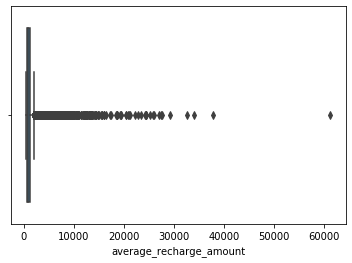

In [30]:
import seaborn as sns
sns.boxplot(x=telecom_churn['average_recharge_amount'])

In [31]:
# Function to remove the outliers for the column.
def removeOutliers(data,columnName):
 q1 = data[columnName].quantile(0.01)
 q3 = data[columnName].quantile(0.99)
 iqr = q3-q1 #Interquartile range
 fence_low  = q1-1.5*iqr
 fence_high = q3+1.5*iqr
 data = data.loc[(telecom_churn[columnName] > fence_low) & (telecom_churn[columnName] < fence_high)]
 return data

In [32]:
# Function to view the plot and view the outlier for each column.
def plotAndViewOutliers(data,columnName):
    sns.boxplot(x=data[columnName])
    print(data[columnName].describe(percentiles=[0.25,0.75,1.00]))

In [33]:
telecom_churn = removeOutliers(telecom_churn,'average_recharge_amount')

count    29910.000000
mean      1123.170672
std       1052.184331
min        478.500000
25%        603.500000
50%        800.000000
75%       1205.875000
100%     14472.750000
max      14472.750000
Name: average_recharge_amount, dtype: float64


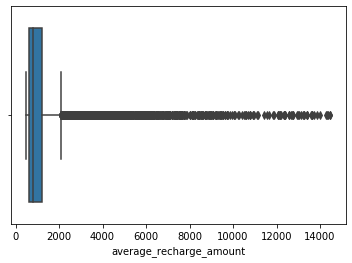

In [34]:
plotAndViewOutliers(telecom_churn,'average_recharge_amount')

count    29910.000000
mean       555.681476
std        412.679452
min      -2258.709000
25%        309.805750
50%        481.698500
75%        699.566500
100%     11505.508000
max      11505.508000
Name: arpu_6, dtype: float64


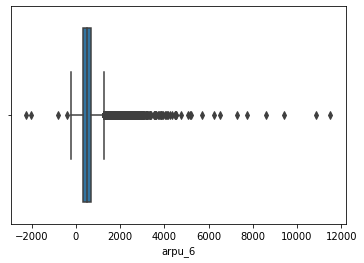

In [35]:
plotAndViewOutliers(telecom_churn,'arpu_6')

count    29898.000000
mean       552.917061
std        386.645471
min      -2258.709000
25%        309.747250
50%        481.620000
75%        699.168250
100%      4742.254000
max       4742.254000
Name: arpu_6, dtype: float64


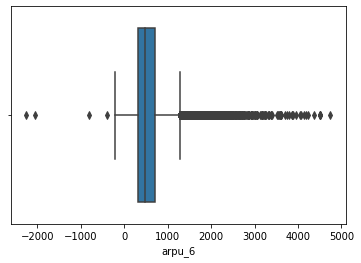

In [36]:
telecom_churn = removeOutliers(telecom_churn,'arpu_6')
plotAndViewOutliers(telecom_churn,'arpu_6')

count    29898.000000
mean       555.963937
std        402.512717
min      -2014.045000
25%        309.841750
50%        480.903000
75%        697.728500
100%     13224.119000
max      13224.119000
Name: arpu_7, dtype: float64


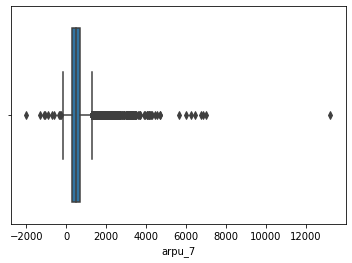

In [37]:
plotAndViewOutliers(telecom_churn,'arpu_7')

count    29890.000000
mean       554.163610
std        385.421042
min      -2014.045000
25%        309.808250
50%        480.755000
75%        697.538000
100%      4723.647000
max       4723.647000
Name: arpu_7, dtype: float64


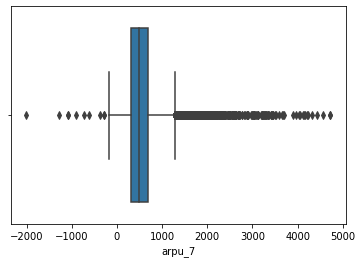

In [38]:
telecom_churn = removeOutliers(telecom_churn,'arpu_7')
plotAndViewOutliers(telecom_churn,'arpu_7')

count    29890.000000
mean       502.678935
std        413.515660
min       -945.808000
25%        231.369500
50%        427.579000
75%        660.748250
100%      6838.828000
max       6838.828000
Name: arpu_8, dtype: float64


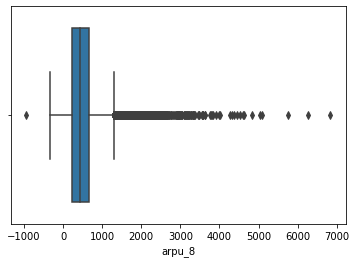

In [39]:
plotAndViewOutliers(telecom_churn,'arpu_8')

count    29885.000000
mean       501.793860
std        407.751163
min       -945.808000
25%        231.334000
50%        427.575000
75%        660.480000
100%      4822.844000
max       4822.844000
Name: arpu_8, dtype: float64


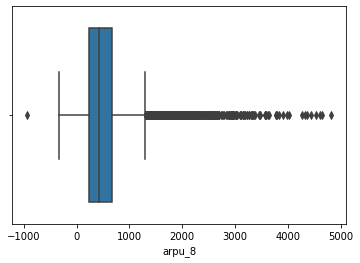

In [40]:
telecom_churn = removeOutliers(telecom_churn,'arpu_8')
plotAndViewOutliers(telecom_churn,'arpu_8')

count    29885.000000
mean      1209.916580
std        957.690042
min        180.000000
25%        460.000000
50%        847.000000
75%       1759.000000
100%      4321.000000
max       4321.000000
Name: aon, dtype: float64


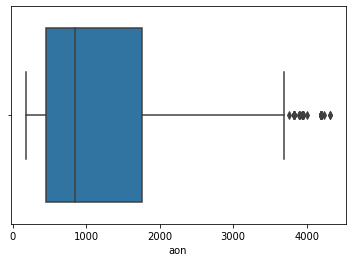

In [41]:
plotAndViewOutliers(telecom_churn,'aon')

count    29885.000000
mean      1209.916580
std        957.690042
min        180.000000
25%        460.000000
50%        847.000000
75%       1759.000000
100%      4321.000000
max       4321.000000
Name: aon, dtype: float64


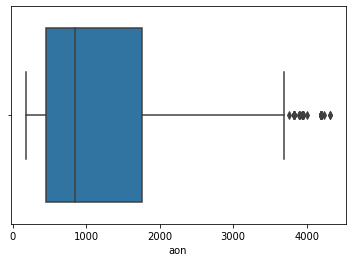

In [42]:
telecom_churn = removeOutliers(telecom_churn,'aon')
plotAndViewOutliers(telecom_churn,'aon')

count    29885.000000
mean       177.863661
std        439.009249
min          0.000000
25%          0.000000
50%          0.000000
75%        136.800000
100%      9165.600000
max       9165.600000
Name: jul_vbc_3g, dtype: float64


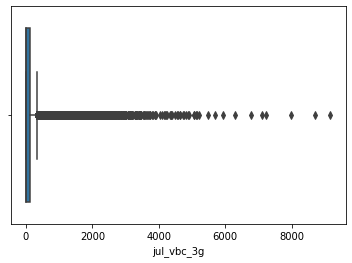

In [43]:
plotAndViewOutliers(telecom_churn,'jul_vbc_3g')

count    29873.000000
mean       175.231118
std        418.179490
min          0.000000
25%          0.000000
50%          0.000000
75%        136.450000
100%      5118.790000
max       5118.790000
Name: jul_vbc_3g, dtype: float64


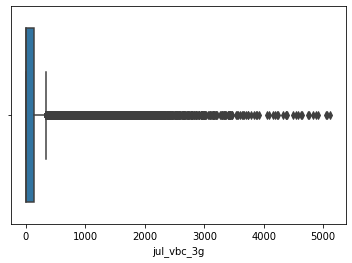

In [44]:
telecom_churn = removeOutliers(telecom_churn,'jul_vbc_3g')
plotAndViewOutliers(telecom_churn,'jul_vbc_3g')

count    29873.000000
mean       156.514900
std        405.154545
min          0.000000
25%          0.000000
50%          0.000000
75%         98.010000
100%      7581.250000
max       7581.250000
Name: jun_vbc_3g, dtype: float64


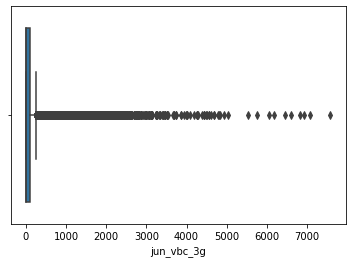

In [45]:
plotAndViewOutliers(telecom_churn,'jun_vbc_3g')

count    29859.000000
mean       153.753489
std        384.172152
min          0.000000
25%          0.000000
50%          0.000000
75%         97.700000
100%      4780.950000
max       4780.950000
Name: jun_vbc_3g, dtype: float64


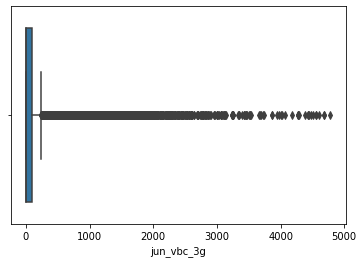

In [46]:
telecom_churn = removeOutliers(telecom_churn,'jun_vbc_3g')
plotAndViewOutliers(telecom_churn,'jun_vbc_3g')

count    29859.000000
mean       166.238092
std        404.032739
min          0.000000
25%          0.000000
50%          0.000000
75%        126.605000
100%      7570.830000
max       7570.830000
Name: aug_vbc_3g, dtype: float64


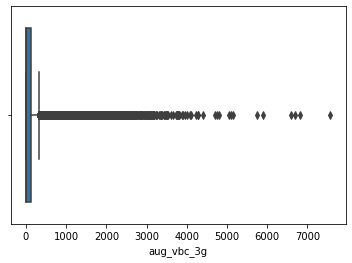

In [47]:
plotAndViewOutliers(telecom_churn,'aug_vbc_3g')

count    29849.000000
mean       164.303009
std        389.682406
min          0.000000
25%          0.000000
50%          0.000000
75%        126.320000
100%      4741.260000
max       4741.260000
Name: aug_vbc_3g, dtype: float64


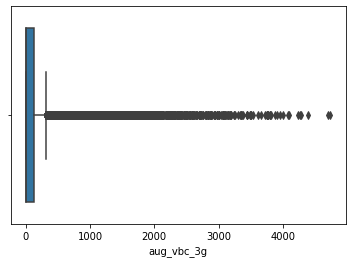

In [48]:
telecom_churn = removeOutliers(telecom_churn,'aug_vbc_3g')
plotAndViewOutliers(telecom_churn,'aug_vbc_3g')

count    29849.000000
mean       233.868516
std        314.029065
min          0.000000
25%         52.740000
50%        134.730000
75%        297.510000
100%      7454.630000
max       7454.630000
Name: loc_ic_mou_6, dtype: float64


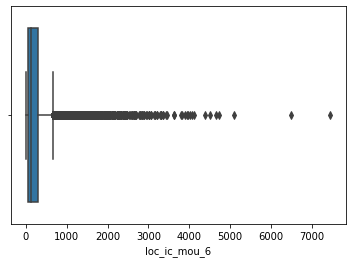

In [49]:
plotAndViewOutliers(telecom_churn,'loc_ic_mou_6')

count    29834.000000
mean       231.675065
std        297.608907
min          0.000000
25%         52.667500
50%        134.570000
75%        297.025000
100%      3635.480000
max       3635.480000
Name: loc_ic_mou_6, dtype: float64


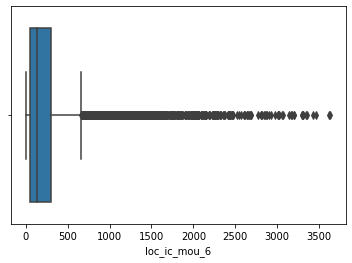

In [50]:
telecom_churn = removeOutliers(telecom_churn,'loc_ic_mou_6')
plotAndViewOutliers(telecom_churn,'loc_ic_mou_6')

count    29834.000000
mean       235.368762
std        305.432197
min          0.000000
25%         57.845000
50%        137.700000
75%        298.687500
100%      6466.740000
max       6466.740000
Name: loc_ic_mou_7, dtype: float64


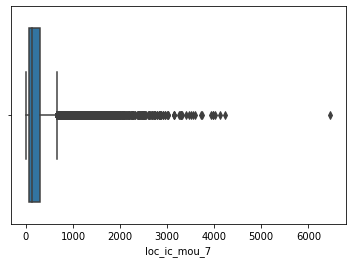

In [51]:
plotAndViewOutliers(telecom_churn,'loc_ic_mou_7')


count    29825.000000
mean       234.160234
std        297.121856
min          0.000000
25%         57.840000
50%        137.630000
75%        298.490000
100%      3587.910000
max       3587.910000
Name: loc_ic_mou_7, dtype: float64


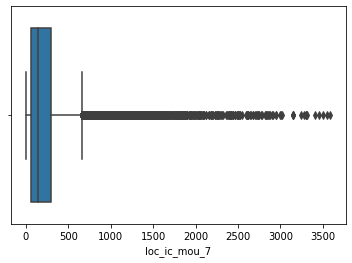

In [52]:
telecom_churn = removeOutliers(telecom_churn,'loc_ic_mou_7')
plotAndViewOutliers(telecom_churn,'loc_ic_mou_7')

count    29825.000000
mean       293.924397
std        357.467580
min          0.000000
25%         79.040000
50%        187.660000
75%        376.980000
100%      7279.080000
max       7279.080000
Name: total_ic_mou_7, dtype: float64


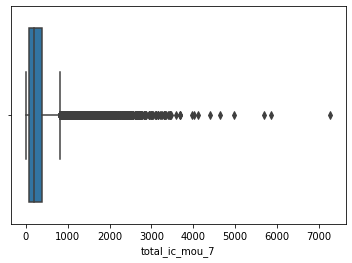

In [53]:
plotAndViewOutliers(telecom_churn,'total_ic_mou_7')

count    29819.000000
mean       292.881666
std        349.598797
min          0.000000
25%         79.030000
50%        187.580000
75%        376.820000
100%      4108.430000
max       4108.430000
Name: total_ic_mou_7, dtype: float64


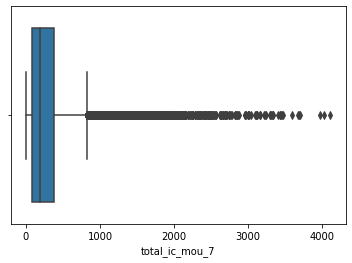

In [54]:
telecom_churn = removeOutliers(telecom_churn,'total_ic_mou_7')
plotAndViewOutliers(telecom_churn,'total_ic_mou_7')

count    29819.000000
mean       277.160192
std        347.437425
min          0.000000
25%         61.500000
50%        173.030000
75%        360.730000
100%      5990.710000
max       5990.710000
Name: total_ic_mou_8, dtype: float64


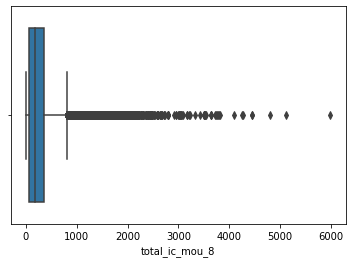

In [55]:
plotAndViewOutliers(telecom_churn,'total_ic_mou_8')

count    29812.000000
mean       276.107687
std        340.504778
min          0.000000
25%         61.475000
50%        172.975000
75%        360.590000
100%      4091.090000
max       4091.090000
Name: total_ic_mou_8, dtype: float64


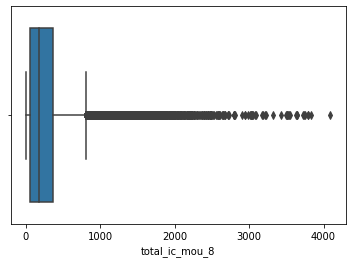

In [56]:
telecom_churn = removeOutliers(telecom_churn,'total_ic_mou_8')
plotAndViewOutliers(telecom_churn,'total_ic_mou_8')

count    29812.000000
mean       609.676405
std        688.909948
min          0.000000
25%        116.957500
50%        411.420000
75%        858.595000
100%     10674.030000
max      10674.030000
Name: total_og_mou_6, dtype: float64


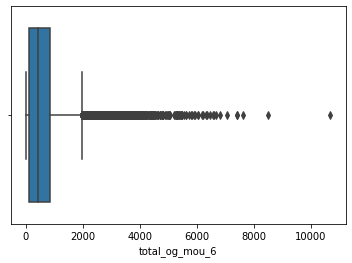

In [57]:
plotAndViewOutliers(telecom_churn,'total_og_mou_6')

count    29810.000000
mean       609.074491
std        684.943800
min          0.000000
25%        116.912500
50%        411.370000
75%        858.477500
100%      7597.180000
max       7597.180000
Name: total_og_mou_6, dtype: float64


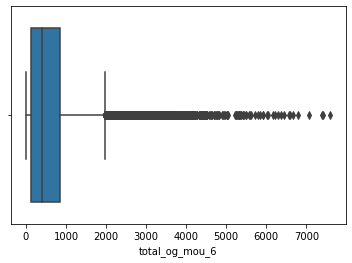

In [58]:
telecom_churn = removeOutliers(telecom_churn,'total_og_mou_6')
plotAndViewOutliers(telecom_churn,'total_og_mou_6')

count    29810.000000
mean       240.547085
std        355.311513
min          0.000000
25%         32.080000
50%        132.395875
75%        310.440000
100%     10196.830000
max      10196.830000
Name: loc_og_mou_8, dtype: float64


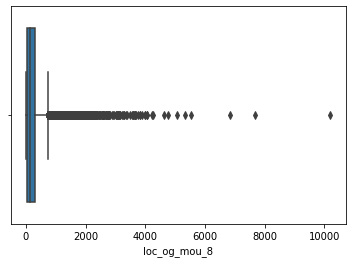

In [59]:
plotAndViewOutliers(telecom_churn,'loc_og_mou_8')

count    29800.000000
mean       238.665814
std        338.618975
min          0.000000
25%         32.060000
50%        132.310000
75%        310.082500
100%      4072.030000
max       4072.030000
Name: loc_og_mou_8, dtype: float64


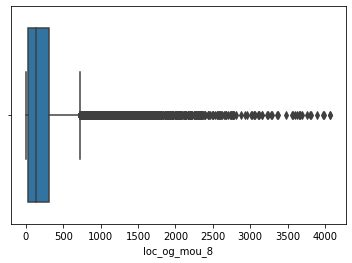

In [60]:
telecom_churn = removeOutliers(telecom_churn,'loc_og_mou_8')
plotAndViewOutliers(telecom_churn,'loc_og_mou_8')

count    29800.000000
mean       255.871287
std        361.482047
min          0.000000
25%         39.087500
50%        132.395875
75%        333.287500
100%      5844.730000
max       5844.730000
Name: loc_og_mou_7, dtype: float64


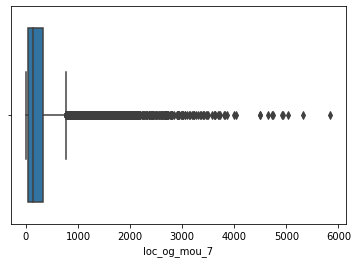

In [61]:
plotAndViewOutliers(telecom_churn,'loc_og_mou_7')

count    29790.000000
mean       254.305681
std        351.222373
min          0.000000
25%         39.080000
50%        132.395875
75%        332.847500
100%      4038.530000
max       4038.530000
Name: loc_og_mou_7, dtype: float64


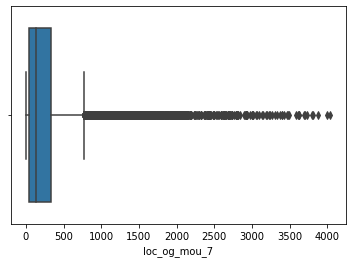

In [62]:
telecom_churn = removeOutliers(telecom_churn,'loc_og_mou_7')
plotAndViewOutliers(telecom_churn,'loc_og_mou_7')

count    29790.000000
mean       254.056654
std        360.905483
min          0.000000
25%         37.010000
50%        132.395875
75%        331.630000
100%      5303.190000
max       5303.190000
Name: loc_og_mou_6, dtype: float64


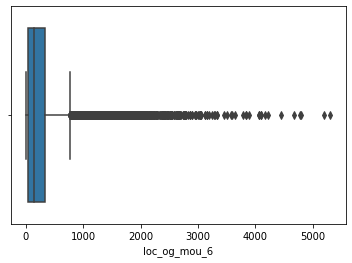

In [63]:
plotAndViewOutliers(telecom_churn,'loc_og_mou_6')

count    29784.000000
mean       253.128579
std        354.942418
min          0.000000
25%         36.990000
50%        132.395875
75%        331.515000
100%      4223.380000
max       4223.380000
Name: loc_og_mou_6, dtype: float64


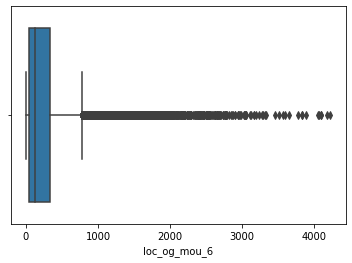

In [64]:
telecom_churn = removeOutliers(telecom_churn,'loc_og_mou_6')
plotAndViewOutliers(telecom_churn,'loc_og_mou_6')

count    29784.000000
mean        48.488139
std        127.639525
min          0.000000
25%          1.410000
50%         12.645000
75%         45.582500
100%      3616.160000
max       3616.160000
Name: std_ic_mou_6, dtype: float64


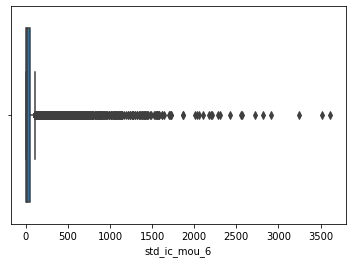

In [65]:
plotAndViewOutliers(telecom_churn,'std_ic_mou_6')

count    29732.000000
mean        45.268256
std         99.111505
min          0.000000
25%          1.410000
50%         12.585000
75%         45.215000
100%      1359.930000
max       1359.930000
Name: std_ic_mou_6, dtype: float64


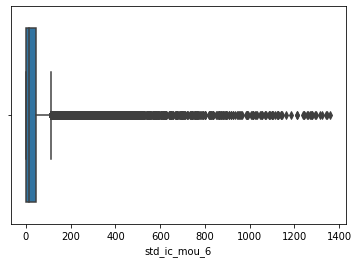

In [66]:
telecom_churn = removeOutliers(telecom_churn,'std_ic_mou_6')
plotAndViewOutliers(telecom_churn,'std_ic_mou_6')

count    29732.000000
mean        48.285459
std        117.098404
min          0.000000
25%          1.430000
50%         13.380000
75%         47.730000
100%      3040.730000
max       3040.730000
Name: std_ic_mou_7, dtype: float64


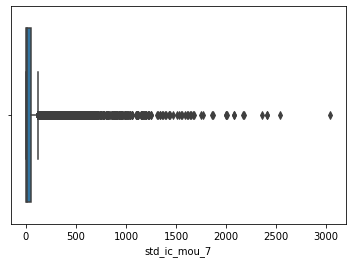

In [67]:
plotAndViewOutliers(telecom_churn,'std_ic_mou_7')

count    29732.000000
mean        47.160501
std        116.562695
min          0.000000
25%          1.025000
50%         11.880000
75%         47.132500
100%      3455.710000
max       3455.710000
Name: std_ic_mou_8, dtype: float64


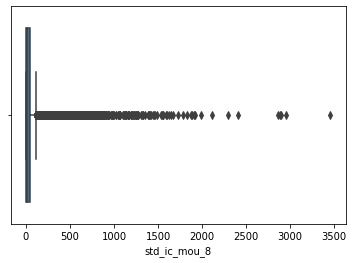

In [68]:
plotAndViewOutliers(telecom_churn,'std_ic_mou_8')

count    29697.000000
mean        46.206964
std         99.380441
min          0.000000
25%          1.410000
50%         13.330000
75%         47.430000
100%      1337.160000
max       1337.160000
Name: std_ic_mou_7, dtype: float64


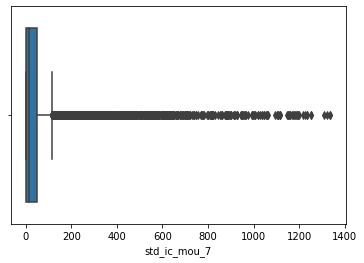

In [69]:
telecom_churn = removeOutliers(telecom_churn,'std_ic_mou_7')
plotAndViewOutliers(telecom_churn,'std_ic_mou_7')

count    29697.000000
mean       605.536652
std        676.248284
min          0.000000
25%        116.380000
50%        409.980000
75%        856.390000
100%      7597.180000
max       7597.180000
Name: total_og_mou_6, dtype: float64


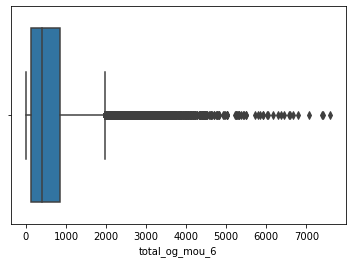

In [70]:
telecom_churn = removeOutliers(telecom_churn,'total_og_mou_6')
plotAndViewOutliers(telecom_churn,'total_og_mou_6')

count    29697.000000
mean       623.382765
std        700.826576
min          0.000000
25%        116.490000
50%        424.930000
75%        889.310000
100%      8327.880000
max       8327.880000
Name: total_og_mou_7, dtype: float64


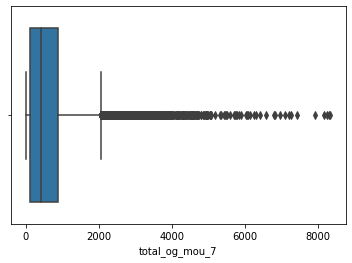

In [71]:
plotAndViewOutliers(telecom_churn,'total_og_mou_7')

count    29693.000000
mean       622.355429
std        695.260766
min          0.000000
25%        116.490000
50%        424.840000
75%        888.940000
100%      7908.960000
max       7908.960000
Name: total_og_mou_7, dtype: float64


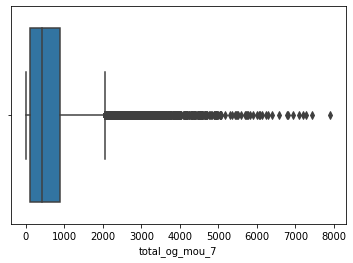

In [72]:
telecom_churn = removeOutliers(telecom_churn,'total_og_mou_7')
plotAndViewOutliers(telecom_churn,'total_og_mou_7')

count    29693.000000
mean       545.179339
std        670.088865
min          0.000000
25%         72.160000
50%        332.630000
75%        771.230000
100%      8309.780000
max       8309.780000
Name: total_og_mou_8, dtype: float64


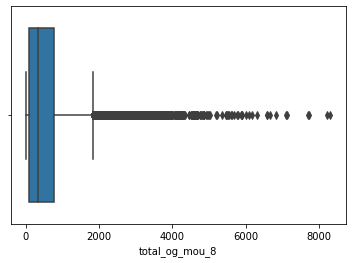

In [73]:
plotAndViewOutliers(telecom_churn,'total_og_mou_8')


count    29691.000000
mean       544.659587
std        667.111967
min          0.000000
25%         72.125000
50%        332.630000
75%        771.115000
100%      7739.510000
max       7739.510000
Name: total_og_mou_8, dtype: float64


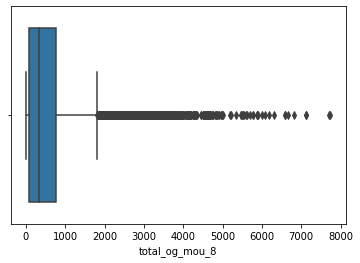

In [74]:
telecom_churn = removeOutliers(telecom_churn,'total_og_mou_8')
plotAndViewOutliers(telecom_churn,'total_og_mou_8')

count    29691.000000
mean       105.209953
std        308.767484
min          0.000000
25%          0.000000
50%          0.000000
75%         51.210000
100%     11117.610000
max      11117.610000
Name: vol_2g_mb_8, dtype: float64


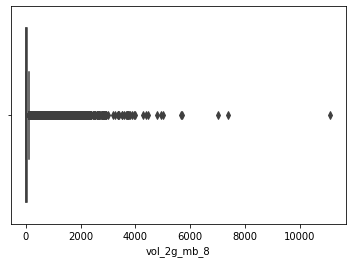

In [75]:
plotAndViewOutliers(telecom_churn,'vol_2g_mb_8')

count    29670.000000
mean       101.825519
std        277.586838
min          0.000000
25%          0.000000
50%          0.000000
75%         50.817500
100%      3570.710000
max       3570.710000
Name: vol_2g_mb_8, dtype: float64


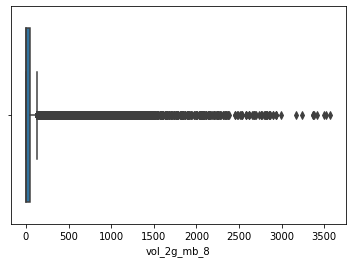

In [76]:
telecom_churn = removeOutliers(telecom_churn,'vol_2g_mb_8')
plotAndViewOutliers(telecom_churn,'vol_2g_mb_8')

count    29670.000000
mean       339.511546
std        836.388591
min          0.000000
25%          0.000000
50%          0.000000
75%        351.175000
100%     28919.680000
max      28919.680000
Name: vol_3g_mb_8, dtype: float64


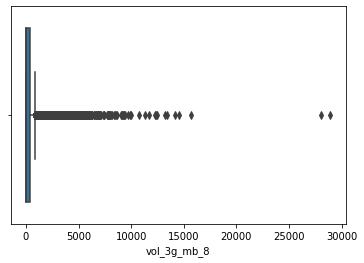

In [77]:
plotAndViewOutliers(telecom_churn,'vol_3g_mb_8')

count    29653.000000
mean       331.680936
std        758.379129
min          0.000000
25%          0.000000
50%          0.000000
75%        349.840000
100%      9327.720000
max       9327.720000
Name: vol_3g_mb_8, dtype: float64


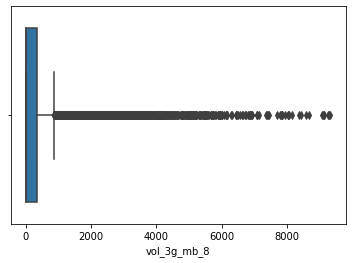

In [78]:
telecom_churn = removeOutliers(telecom_churn,'vol_3g_mb_8')
plotAndViewOutliers(telecom_churn,'vol_3g_mb_8')

count    29653.000000
mean       327.087115
std        773.651422
min          0.000000
25%          0.000000
50%          0.000000
75%        353.360000
100%     21493.370000
max      21493.370000
Name: vol_3g_mb_6, dtype: float64


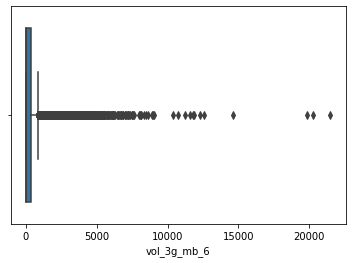

In [79]:
plotAndViewOutliers(telecom_churn,'vol_3g_mb_6')

count    29653.000000
mean       351.307708
std        778.733650
min          0.000000
25%          0.000000
50%          0.000000
75%        405.770000
100%     11371.270000
max      11371.270000
Name: vol_3g_mb_7, dtype: float64


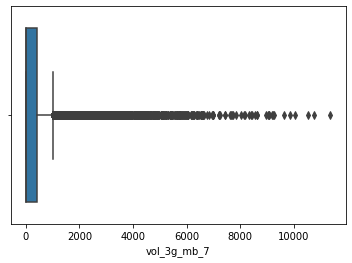

In [80]:
plotAndViewOutliers(telecom_churn,'vol_3g_mb_7')

count    29644.000000
mean       348.380759
std        760.410146
min          0.000000
25%          0.000000
50%          0.000000
75%        405.090000
100%      9070.760000
max       9070.760000
Name: vol_3g_mb_7, dtype: float64


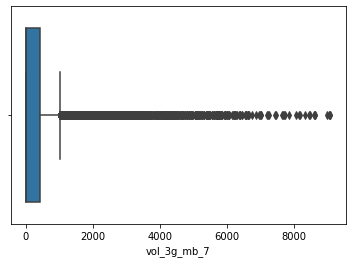

In [81]:
telecom_churn = removeOutliers(telecom_churn,'vol_3g_mb_7')
plotAndViewOutliers(telecom_churn,'vol_3g_mb_7')

count    29629.000000
mean       319.887519
std        711.420529
min          0.000000
25%          0.000000
50%          0.000000
75%        351.210000
100%      8654.490000
max       8654.490000
Name: vol_3g_mb_6, dtype: float64


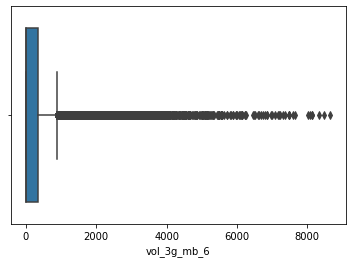

In [82]:
telecom_churn = removeOutliers(telecom_churn,'vol_3g_mb_6')
plotAndViewOutliers(telecom_churn,'vol_3g_mb_6')

count    29629.000000
mean       160.702401
std        387.590292
min          0.000000
25%          0.000000
50%         15.530000
75%        132.395875
100%      7078.660000
max       7078.660000
Name: std_og_t2m_mou_8, dtype: float64


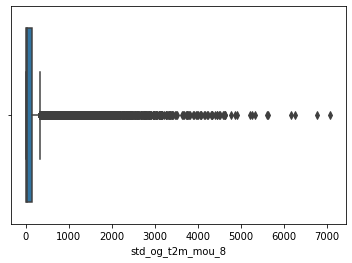

In [83]:
plotAndViewOutliers(telecom_churn,'std_og_t2m_mou_8')

### Let us plot the coulmns for jun, july and august month data vs churned to understand which customers are at high risk of churn.

In [84]:
import matplotlib.pyplot as plt
def plotChurnedVsOthers(colName):
    plt.figure(figsize=(20,16))
    plt.subplot(2,3,1)
    sns.boxplot(data=telecom_churn, y=colName+"_6",x="churned",hue="churned")
    plt.subplot(2,3,2)
    sns.boxplot(data=telecom_churn, y=colName+"_7",x="churned",hue="churned")
    plt.subplot(2,3,3)
    sns.boxplot(data=telecom_churn, y=colName+"_8",x="churned",hue="churned")
    plt.show()

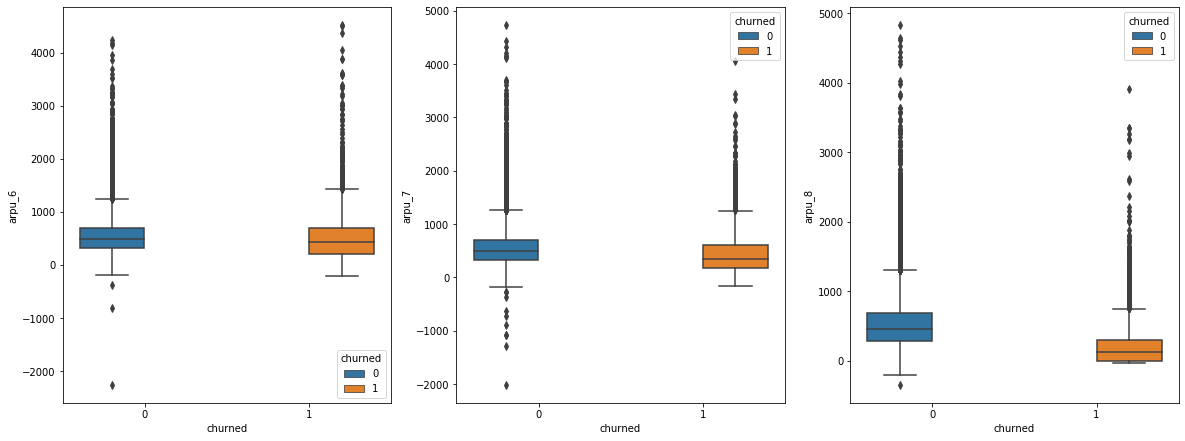

In [85]:
plotChurnedVsOthers("arpu")

#### From the box plots it can be observed that people whose arpu decreases towards the churn phase tend to churn.

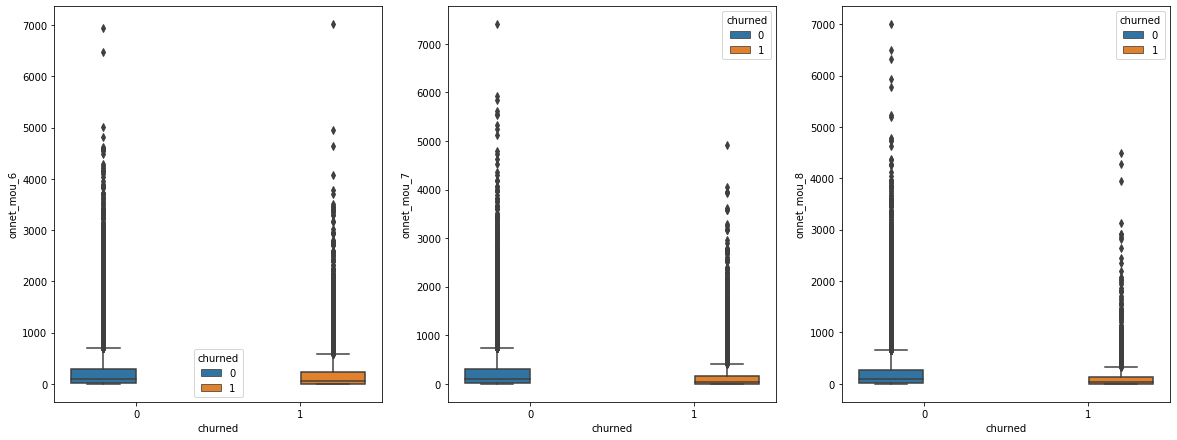

In [86]:
plotChurnedVsOthers("onnet_mou")

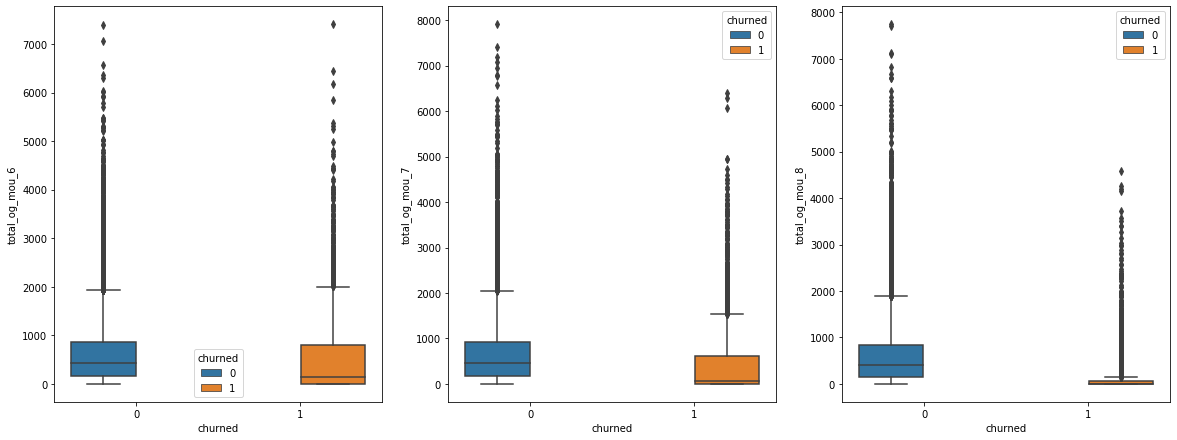

In [87]:
plotChurnedVsOthers("total_og_mou")

#### From the box plots it can be observed that people whose total_og_mou decreases towards the churn phase tend to churn.

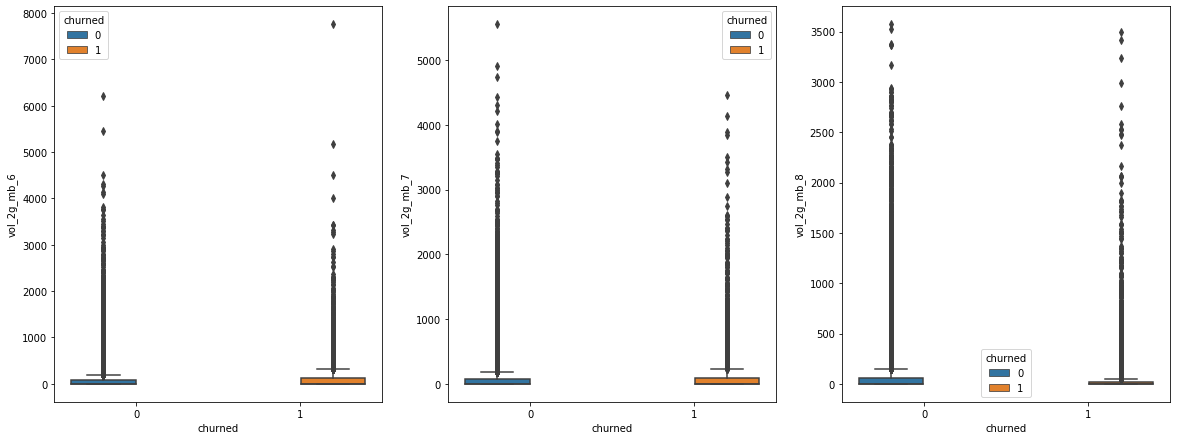

In [88]:
plotChurnedVsOthers("vol_2g_mb")

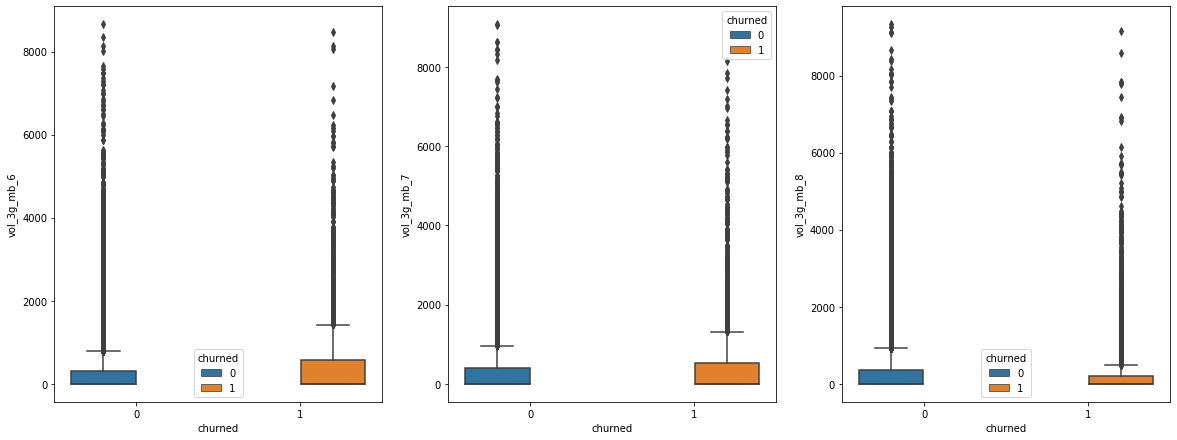

In [89]:
plotChurnedVsOthers("vol_3g_mb")

#### From the box plots it can be observed that people whose vol_3g_mb and vol_2g_mb decreases towards the churn phase tend to churn.

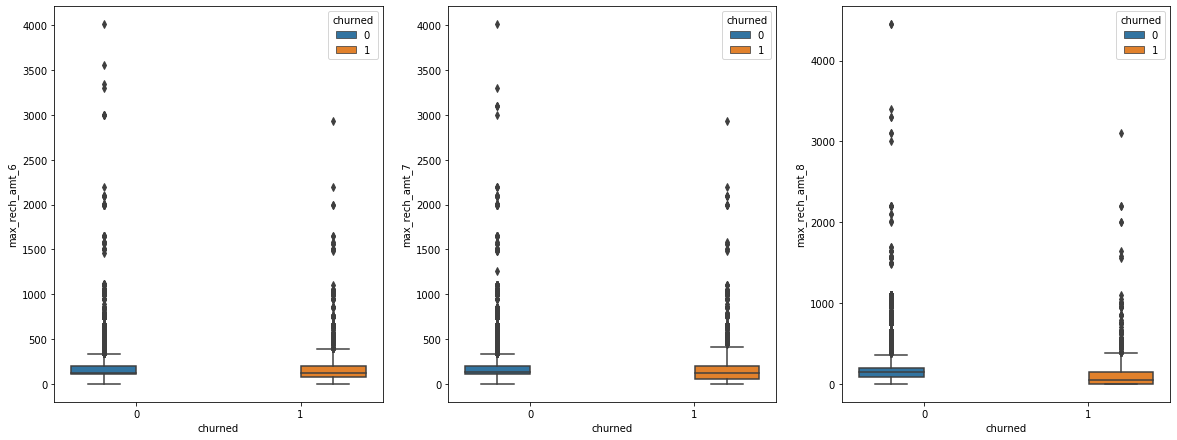

In [90]:
plotChurnedVsOthers("max_rech_amt")

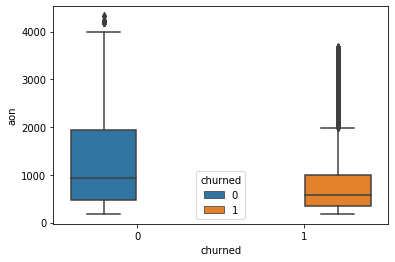

In [91]:
sns.boxplot(data=telecom_churn,y="aon",x="churned",hue="churned")

#### From the above box plot it can be observed that people who are with the network for a longer time tend to churn less

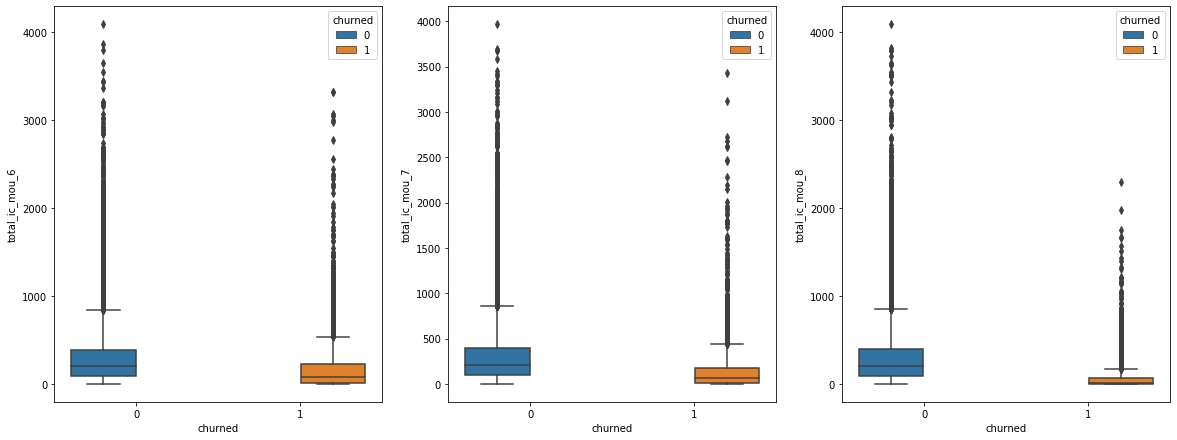

In [92]:
plotChurnedVsOthers("total_ic_mou")

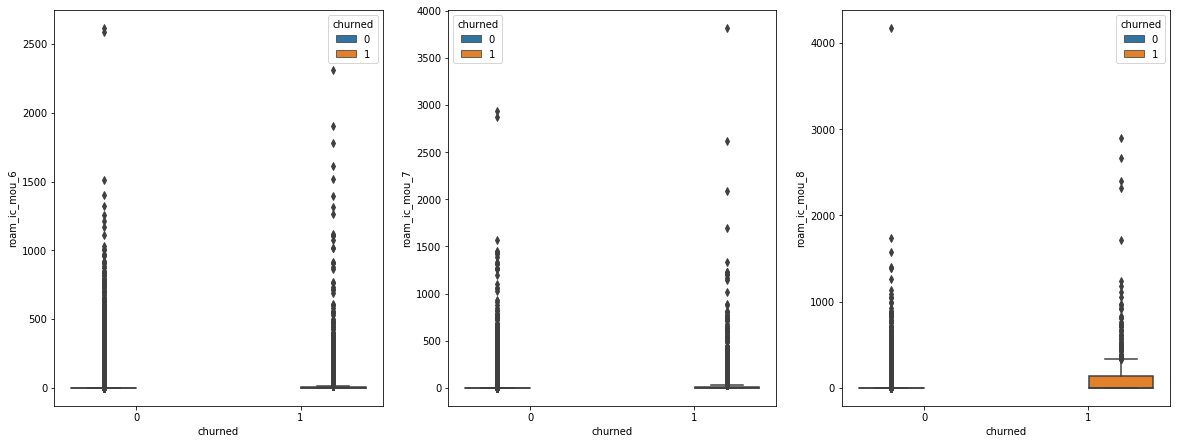

In [93]:
plotChurnedVsOthers("roam_ic_mou")

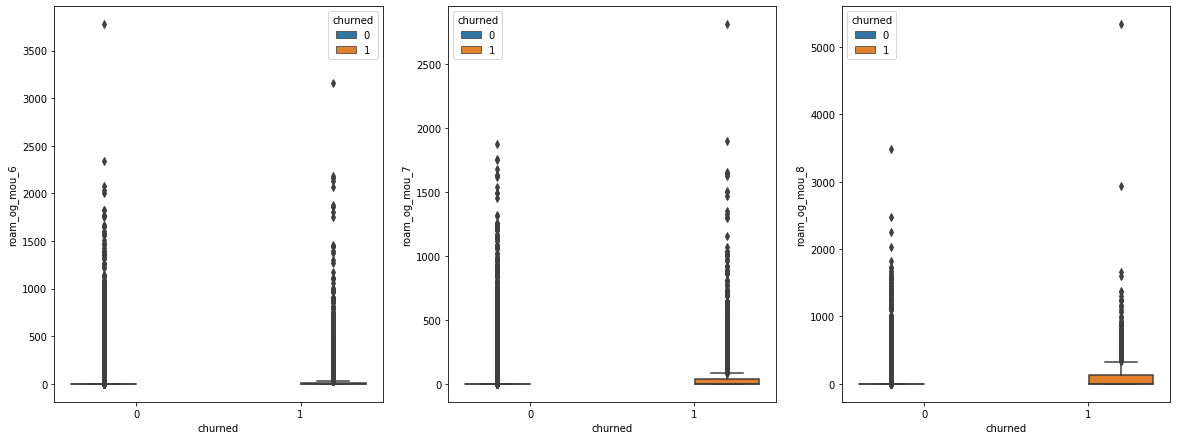

In [94]:
plotChurnedVsOthers("roam_og_mou")

#### From the above plots, it can be observed that, people whose roaming (incoming and outgoing) increases towards the churn phase tend to churn

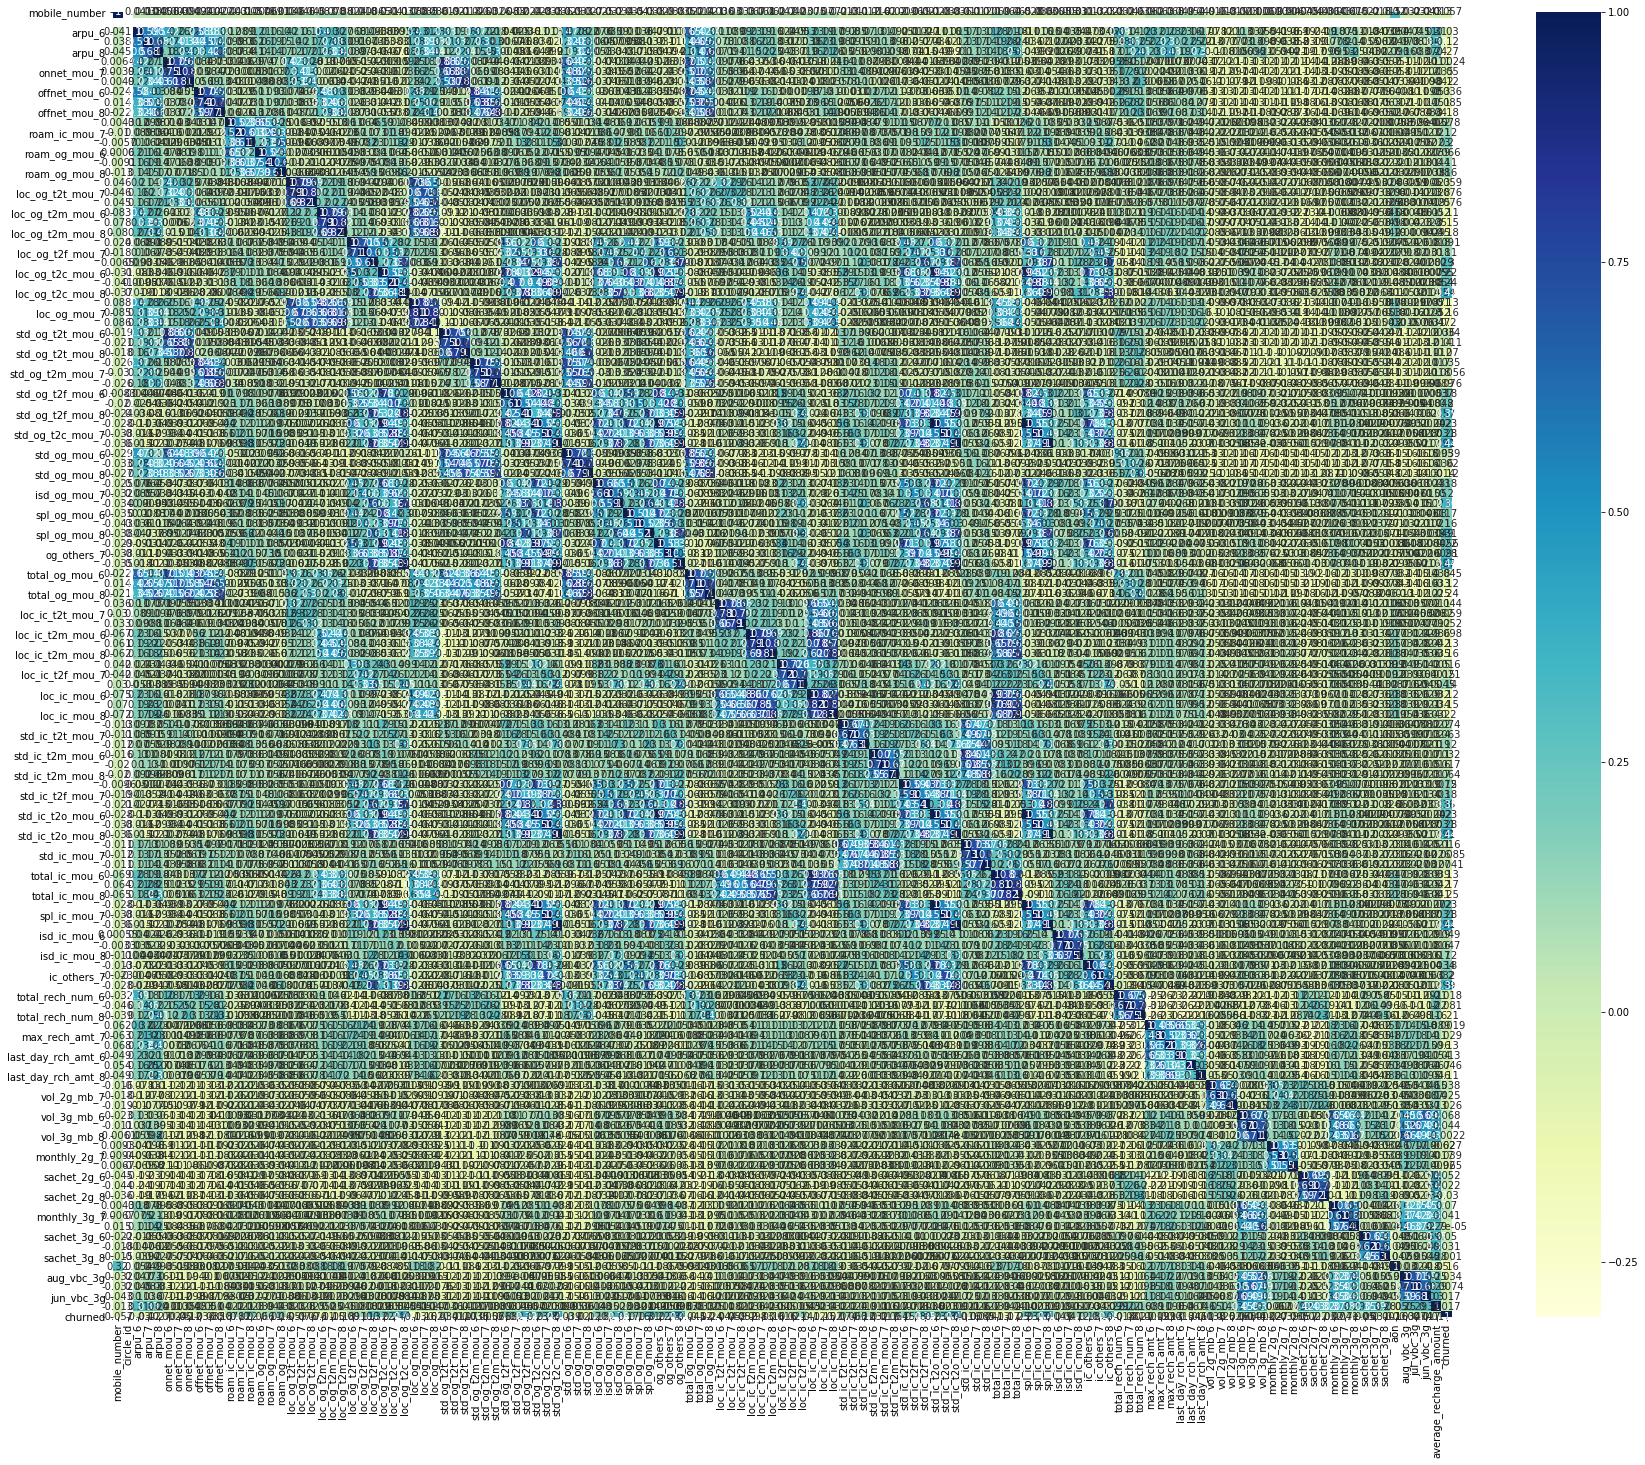

In [95]:
plt.figure(figsize=(30,24))

# heatmap
sns.heatmap(telecom_churn.corr(), cmap="YlGnBu", annot=True)
plt.show()

#### Plotting the heat map to get the top 30 features that are highly correlated with the churned column.

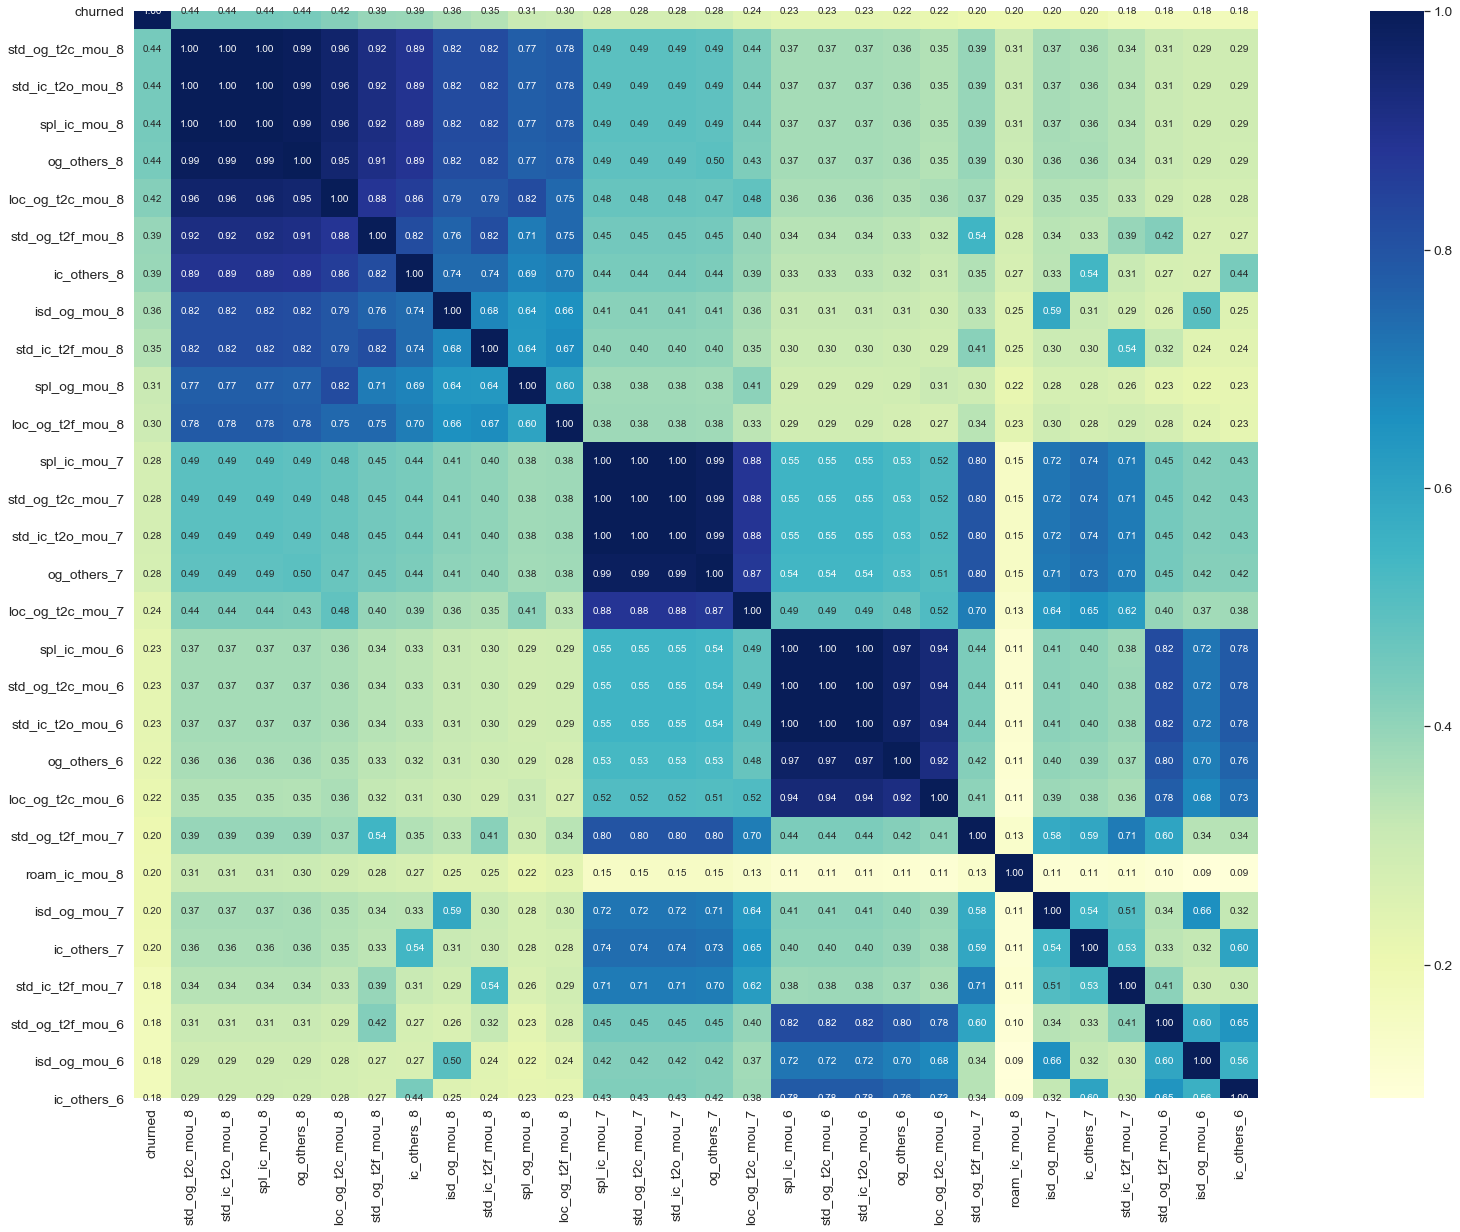

In [96]:
corrmat = telecom_churn.corr()
plt.figure(figsize=(40,20))
k = 30 #number of variables for heatmap
cols = corrmat.nlargest(k, 'churned')['churned'].index
cm = np.corrcoef(telecom_churn[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values, cmap="YlGnBu")
plt.show()

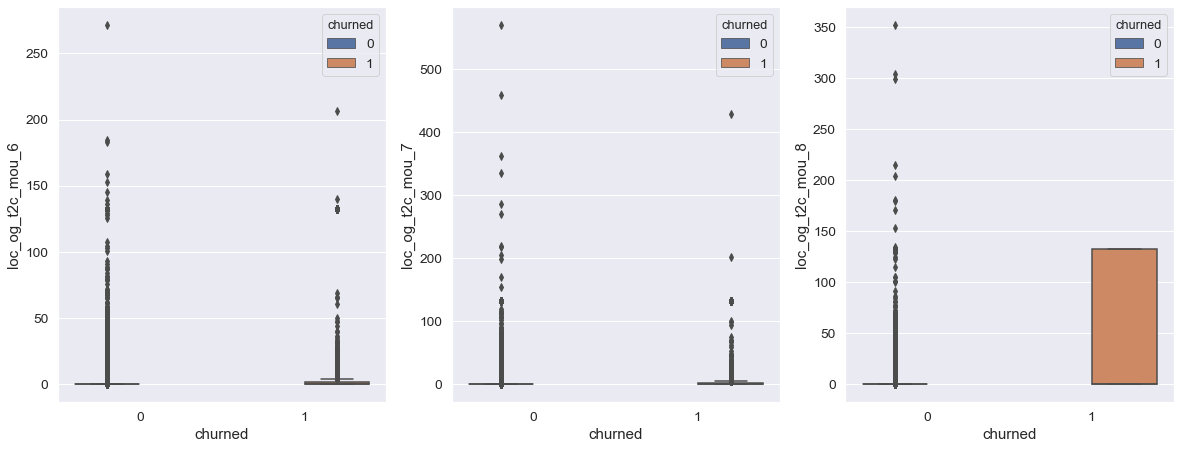

In [97]:
plotChurnedVsOthers("loc_og_t2c_mou")

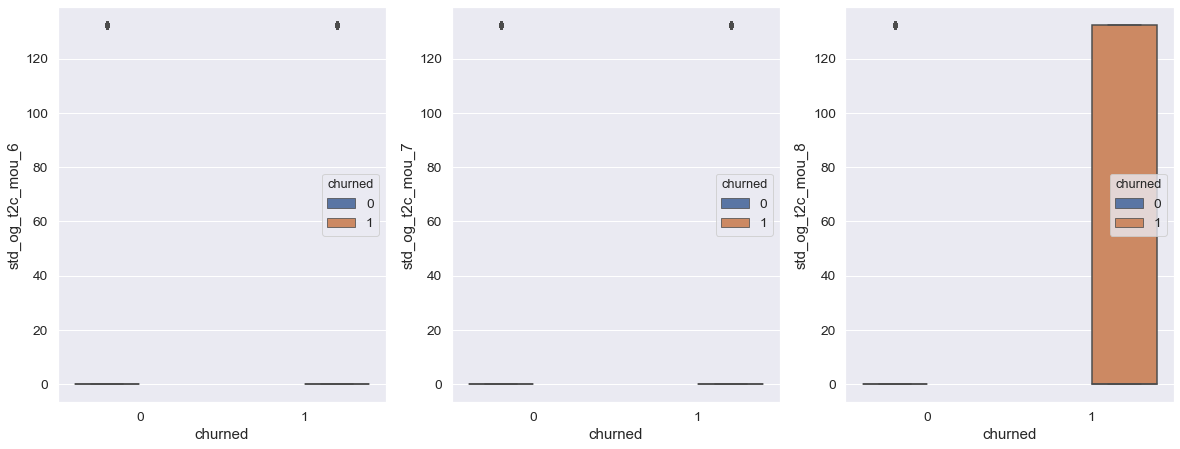

In [98]:
plotChurnedVsOthers("std_og_t2c_mou")

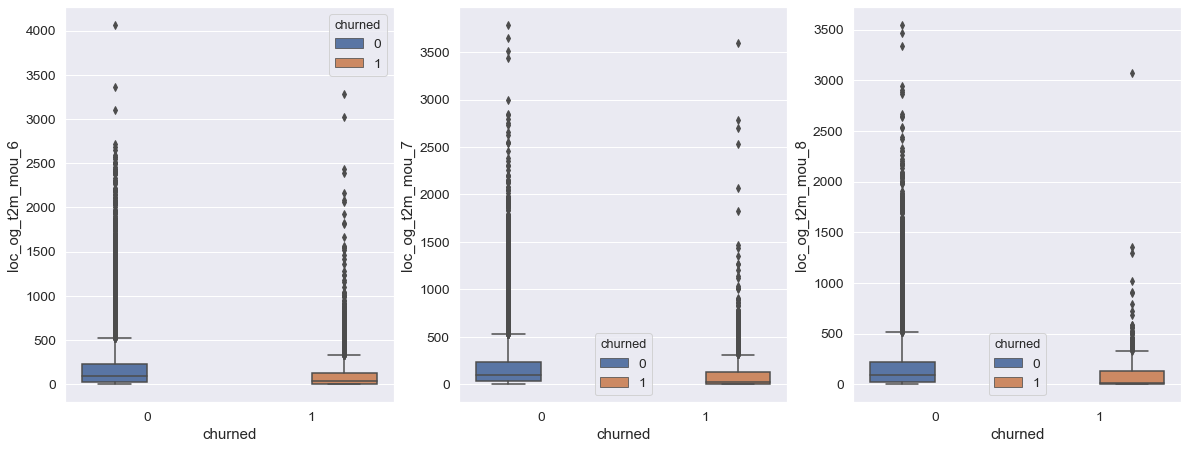

In [99]:
plotChurnedVsOthers("loc_og_t2m_mou")

#### From the above box plot it can be observed that people whose std,local minutes of usage to customer centres and to the other mobile operator network increases towards the churn phase tend to churn

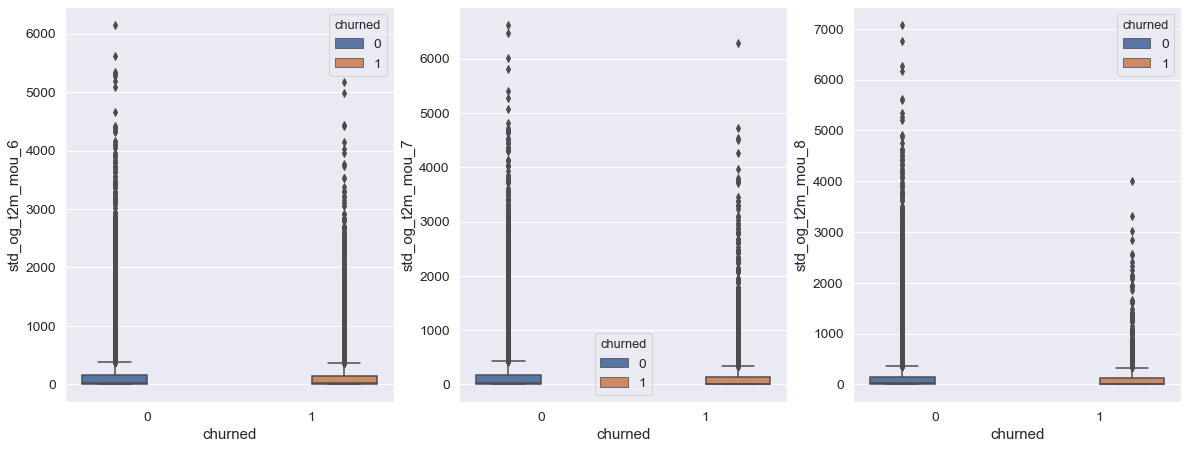

In [100]:
plotChurnedVsOthers("std_og_t2m_mou")

## Model Building

In [101]:
from sklearn.decomposition import PCA

### Splitting Data into Training and Test Sets

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = telecom_churn.drop(['churned','mobile_number'],axis=1)
y = telecom_churn['churned']
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

#### Lets scale the data

In [103]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [104]:
X_test=scaler.transform(X_test)

In [105]:
#Initialise pca with random state
pca = PCA(random_state=42)

In [106]:
print(X_train)

[[ 0.          0.51382    -0.23891866 ... -0.42777317 -0.40485419
  -0.08046234]
 [ 0.         -0.46224648 -0.25205548 ... -0.29585352 -0.19935074
   0.10560531]
 [ 0.         -0.23424868 -0.66197603 ... -0.42777317 -0.40485419
  -0.45056966]
 ...
 [ 0.         -1.00523098 -1.10340037 ... -0.42777317 -0.40485419
  -0.42826182]
 [ 0.         -0.81296238 -0.59450759 ...  0.57278012  0.32077303
  -0.47946845]
 [ 0.          0.70788161 -0.22094168 ... -0.42777317 -0.40485419
  -0.39125109]]


In [107]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [108]:
pca.components_

array([[-1.06387130e-19, -4.20038084e-03, -2.31794430e-02, ...,
         1.52063663e-02,  1.79184160e-02,  3.53850744e-03],
       [ 9.63265339e-20,  1.63081750e-01,  1.78027372e-01, ...,
        -1.97090373e-02, -1.64027785e-02,  1.64183772e-02],
       [ 3.43866524e-19,  5.23363782e-02,  6.59007230e-02, ...,
        -9.06150147e-02, -8.57192882e-02, -2.42765411e-02],
       ...,
       [-0.00000000e+00, -1.74531977e-16, -1.13294379e-16, ...,
        -1.59239660e-16,  1.07753945e-16, -1.29092603e-17],
       [ 0.00000000e+00,  1.25218213e-16,  1.95778775e-17, ...,
         3.48003102e-17, -9.83903899e-18,  3.20611777e-17],
       [ 1.00000000e+00, -3.97021626e-18, -8.27780611e-19, ...,
         2.23007581e-19, -8.20604987e-20,  5.29809896e-18]])

In [109]:
pca.explained_variance_ratio_

array([1.40580683e-01, 1.02493251e-01, 8.41306820e-02, 5.11753109e-02,
       4.39199547e-02, 3.89978262e-02, 3.45435186e-02, 3.33417613e-02,
       2.89821556e-02, 2.57424528e-02, 2.41381600e-02, 2.17593287e-02,
       2.06142314e-02, 1.87539992e-02, 1.77919659e-02, 1.69095731e-02,
       1.45755300e-02, 1.41436331e-02, 1.16073166e-02, 1.10364570e-02,
       1.03480068e-02, 9.49469496e-03, 8.92333458e-03, 8.70183551e-03,
       8.45862324e-03, 8.10967756e-03, 7.56999763e-03, 7.40449449e-03,
       7.06717295e-03, 6.77927286e-03, 6.64628168e-03, 6.51740495e-03,
       6.40849533e-03, 6.37325722e-03, 6.08799128e-03, 5.75522072e-03,
       5.31349061e-03, 5.19699348e-03, 5.00149923e-03, 4.67102546e-03,
       4.47444433e-03, 4.18591559e-03, 3.99059151e-03, 3.85931854e-03,
       3.76947783e-03, 3.60211836e-03, 3.43886751e-03, 3.32644549e-03,
       3.20193309e-03, 3.06207036e-03, 2.95734010e-03, 2.89279751e-03,
       2.83740838e-03, 2.77107482e-03, 2.58912756e-03, 2.50163177e-03,
      

In [110]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([14.06, 24.31, 32.72, 37.84, 42.23, 46.13, 49.58, 52.91, 55.81,
       58.38, 60.79, 62.97, 65.03, 66.91, 68.69, 70.38, 71.84, 73.25,
       74.41, 75.51, 76.54, 77.49, 78.38, 79.25, 80.1 , 80.91, 81.67,
       82.41, 83.12, 83.8 , 84.46, 85.11, 85.75, 86.39, 87.  , 87.58,
       88.11, 88.63, 89.13, 89.6 , 90.05, 90.47, 90.87, 91.26, 91.64,
       92.  , 92.34, 92.67, 92.99, 93.3 , 93.6 , 93.89, 94.17, 94.45,
       94.71, 94.96, 95.2 , 95.44, 95.66, 95.87, 96.08, 96.27, 96.46,
       96.65, 96.83, 97.01, 97.19, 97.36, 97.53, 97.69, 97.84, 97.99,
       98.13, 98.26, 98.39, 98.51, 98.63, 98.74, 98.85, 98.95, 99.05,
       99.14, 99.23, 99.31, 99.39, 99.46, 99.53, 99.6 , 99.66, 99.72,
       99.77, 99.82, 99.86, 99.89, 99.92, 99.94, 99.96, 99.97, 99.98,
       99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98,
       99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98,
       99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98,
       99.98, 99.98,

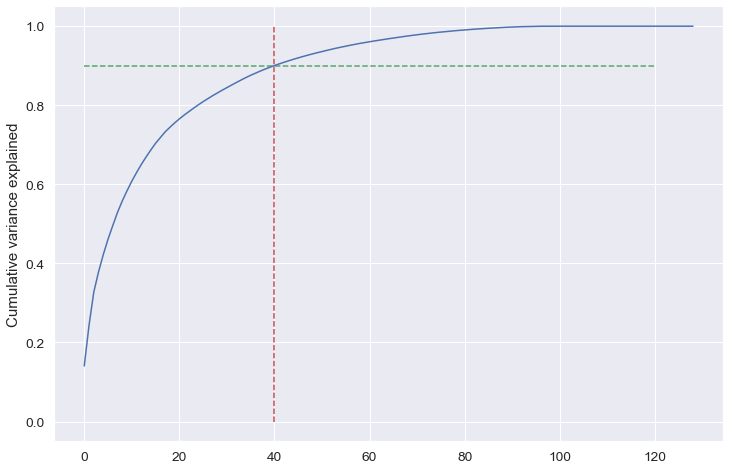

In [111]:
#plot the cumulative variance
fig = plt.figure(figsize=[12,8])
plt.vlines(x=40, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.90, xmax=120, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

#### From the above graph it can be seen that 40 variables explain 90% of variance ratio is explained

In [112]:
from sklearn.decomposition import IncrementalPCA

In [113]:
#Build a PCA model with 53 components
pca_final = IncrementalPCA(n_components=40)

In [114]:
df_train_pca = pca_final.fit_transform(X_train)

In [115]:
df_train_pca.shape

(20740, 40)

In [116]:
corrmat = np.corrcoef(df_train_pca.transpose())

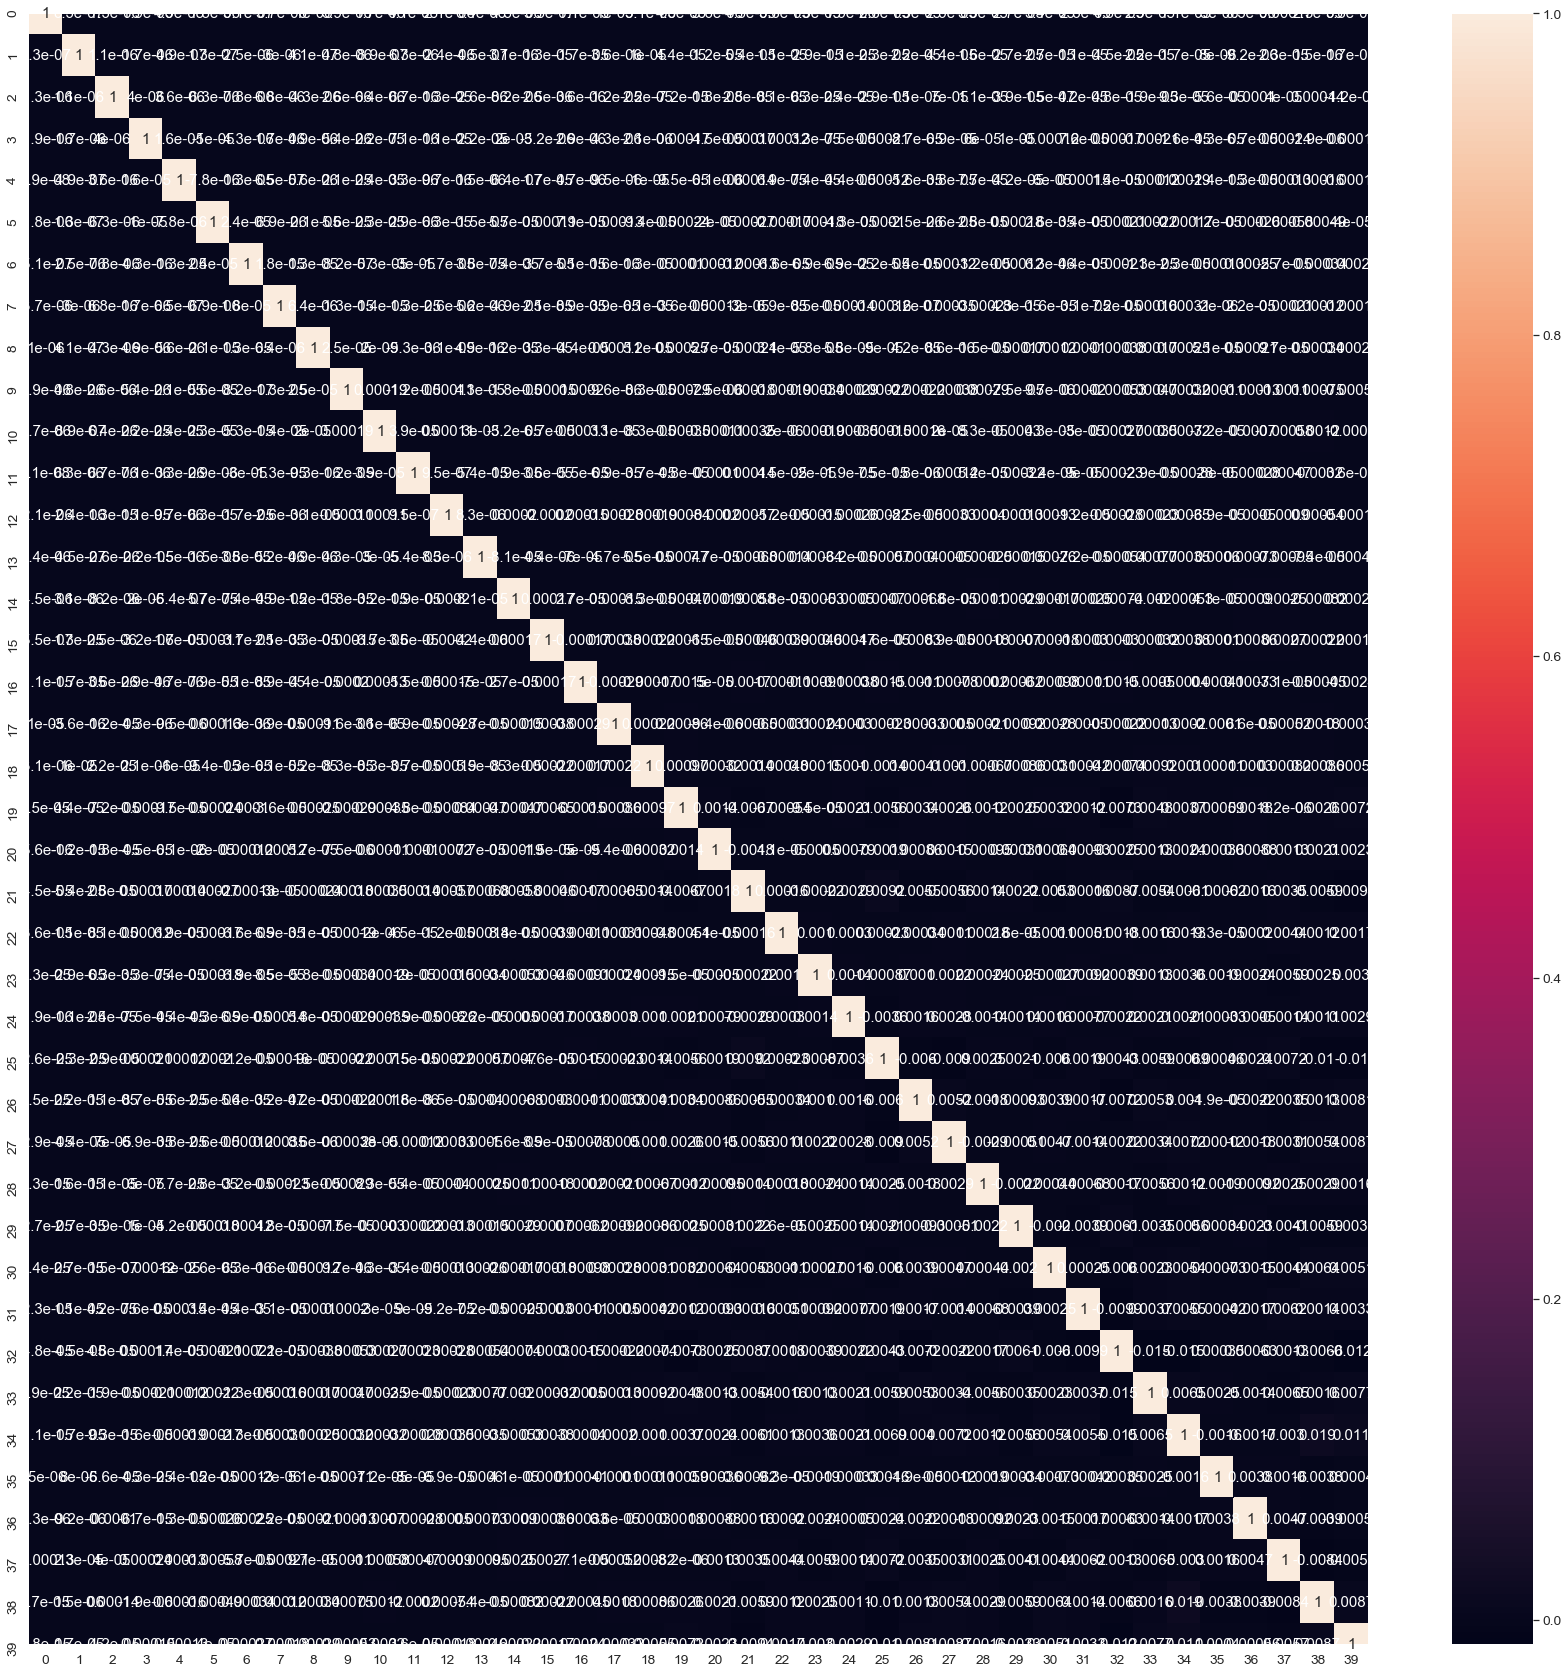

In [117]:
plt.figure(figsize=[30,30])
sns.heatmap(corrmat, annot=True)

#### From the above graph it can be noted that the final variables chosen are not correlated after applying pca

In [118]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8889, 40)

### Model 1 : LogisticRegression with PCA

In [119]:
# cross validation with 'C' param for logistic regression
from sklearn.linear_model import LogisticRegression
learner_pca = LogisticRegression()
from sklearn.model_selection import GridSearchCV
params = {'C': [0.1,0.5,1.0,10,100]}
folds = 5
model_cv = GridSearchCV(estimator = learner_pca, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(df_train_pca, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    6.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 0.5, 1.0, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [120]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.sort_values(by="mean_test_score",ascending=False)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
3       0.261003      0.017417         0.000598        0.000489      10   
4       0.263695      0.018824         0.000997        0.000001     100   
2       0.263096      0.010372         0.001197        0.000399       1   
1       0.292421      0.031100         0.000798        0.000399     0.5   
0       0.264793      0.020433         0.000999        0.000003     0.1   

       params  split0_test_score  split1_test_score  split2_test_score  \
3   {'C': 10}          -0.102675          -0.104147          -0.106075   
4  {'C': 100}          -0.102675          -0.104147          -0.106075   
2  {'C': 1.0}          -0.102916          -0.104388          -0.106075   
1  {'C': 0.5}          -0.103157          -0.104147          -0.106316   
0  {'C': 0.1}          -0.103157          -0.104388          -0.106798   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
3          -0.105352          -0.111165        -0.105882        0.002882   
4          -0.105352          -0.111165        -0.105882        0.002882   
2          -0.105593          -0.111165        -0.106027        0.002791   
1          -0.105593          -0.111165        -0.106075        0.002772   
0          -0.106075          -0.110924        -0.106268        0.002653   

   rank_test_score  split0_train_score  split1_train_score  \
3                1           -0.106202           -0.105171   
4                1           -0.106202           -0.105171   
2                3           -0.106323           -0.105111   
1                4           -0.106443           -0.105231   
0                5           -0.106443           -0.105473   

   split2_train_score  split3_train_score  split4_train_score  \
3           -0.105714           -0.105533           -0.104683   
4           -0.105714           -0.105533           -0.104683   
2           -0.105714           -0.105533           -0.104442   
1           -0.105774           -0.105412           -0.104442   
0           -0.105473           -0.105352           -0.104683   

   mean_train_score  std_train_score  
3         -0.105460         0.000511  
4         -0.105460         0.000511  
2         -0.105424         0.000627  
1         -0.105460         0.000657  
0         -0.105485         0.000562

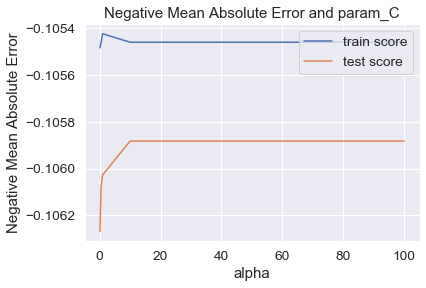

In [121]:
cv_results['param_C'] = cv_results['param_C'].astype('float32')

# plotting
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and param_C")
plt.legend(['train score','test score'], loc='upper right')
plt.show()

In [122]:
#Build logistic regression on top of PCA with the C param chosen from GridSearchCV
learner_pca = LogisticRegression(C=10,class_weight="balanced")

In [123]:
model_pca = learner_pca.fit(df_train_pca, y_train)

In [124]:
pred_probs_test = model_pca.predict_proba(df_test_pca)
prediction_logistic=model_pca.predict(df_test_pca)

In [125]:
#View different metrics using classification report
print(classification_report(y_test,prediction_logistic))

              precision    recall  f1-score   support

           0       0.96      0.80      0.87      7647
           1       0.39      0.81      0.53      1242

    accuracy                           0.80      8889
   macro avg       0.68      0.80      0.70      8889
weighted avg       0.88      0.80      0.83      8889



In [126]:
from sklearn import metrics
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.88'

In [127]:
print(confusion_matrix(y_test,prediction_logistic))
from sklearn.metrics import recall_score
print("Recall score: {}".format(recall_score(y_test,prediction_logistic)))

[[6103 1544]
 [ 235 1007]]
Recall score: 0.8107890499194848


#### From the above reports, Accuracy is at 80%, AUC score is 88% and Recall is at 81% for Logistic Regression model on top of PCA

### Model 2 : RandomForest with PCA

#### HyperTuning parameters for RandomForest

In [128]:
#Grid Search CV for parameter max_features
n_folds = 3
rfc = RandomForestClassifier(class_weight="balanced",random_state=100)
random_grid = {'max_features': range(5,40)}
rf_random = GridSearchCV(rfc, random_grid,
                    cv=n_folds, 
                   scoring="roc_auc",return_train_score='warn')
rf_random.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=100,
                                              verbose=0, warm_start=False),
           

In [129]:
scores = rf_random.cv_results_
scores_results = pd.DataFrame(scores).head()
scores_results.sort_values(by="mean_test_score",ascending=False)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
4       1.576589      0.148025         0.011370        0.001621   
2       1.152717      0.152998         0.012766        0.003478   
0       0.899798      0.146074         0.011171        0.001934   
1       1.046803      0.101819         0.012766        0.002706   
3       1.179050      0.061720         0.009774        0.000747   

  param_max_features               params  split0_test_score  \
4                  9  {'max_features': 9}           0.853128   
2                  7  {'max_features': 7}           0.851771   
0                  5  {'max_features': 5}           0.843652   
1                  6  {'max_features': 6}           0.843876   
3                  8  {'max_features': 8}           0.844979   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
4           0.843025           0.838864           0.829538           0.815170   
2           0.836690           0.841883           0.811068           0.820432   
0           0.835284           0.834869           0.810664           0.827574   
1           0.844038           0.826619           0.820283           0.809371   
3           0.823756           0.836290           0.809752           0.811550   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
4         0.835947        0.012857               24            0.999701   
2         0.832370        0.014710               28            0.999703   
0         0.830409        0.011108               30            0.999756   
1         0.828839        0.013522               32            0.999683   
3         0.825267        0.013721               35            0.999708   

   split1_train_score  split2_train_score  split3_train_score  \
4            0.999536            0.999614            0.999703   
2            0.999557            0.999706            0.999694   
0            0.999624            0.999690            0.999734   
1            0.999626            0.999697            0.999702   
3            0.999594            0.999608            0.999724   

   split4_train_score  mean_train_score  std_train_score  
4            0.999713          0.999653         0.000069  
2            0.999718          0.999676         0.000060  
0            0.999785          0.999718         0.000056  
1            0.999750          0.999692         0.000040  
3            0.999759          0.999678         0.000066

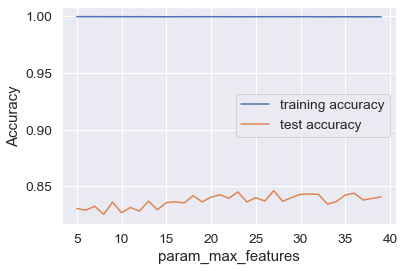

In [130]:
#Plot the graph for max_features param
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("param_max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [131]:
#Grid Search CV for parameter max_depth
n_folds = 3
rfc = RandomForestClassifier(class_weight="balanced",random_state=42)
random_grid = {'max_depth': range(2,10)}
rf_random = GridSearchCV(rfc, random_grid,
                    cv=n_folds, 
                   scoring="roc_auc",return_train_score='warn')
rf_random.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
            

In [132]:
scores = rf_random.cv_results_
scores_results = pd.DataFrame(scores).head()
scores_results.sort_values(by="mean_test_score",ascending=False)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
4       0.443715      0.011997         0.006383        0.000488   
3       0.423070      0.052124         0.006782        0.000977   
2       0.405912      0.012083         0.007580        0.000798   
1       0.272868      0.022712         0.005585        0.000488   
0       0.187200      0.011291         0.005386        0.000489   

  param_max_depth            params  split0_test_score  split1_test_score  \
4               6  {'max_depth': 6}           0.876356           0.863287   
3               5  {'max_depth': 5}           0.877803           0.854919   
2               4  {'max_depth': 4}           0.865413           0.842331   
1               3  {'max_depth': 3}           0.843204           0.835237   
0               2  {'max_depth': 2}           0.837240           0.810101   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
4           0.850495           0.849976           0.842083         0.856441   
3           0.850188           0.836063           0.831492         0.850095   
2           0.847403           0.838063           0.844415         0.847526   
1           0.828230           0.827394           0.822407         0.831295   
0           0.807014           0.812490           0.812789         0.815928   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
4        0.012057                4            0.888065            0.889150   
3        0.016335                5            0.876233            0.878756   
2        0.009447                6            0.863241            0.859772   
1        0.007225                7            0.832730            0.841456   
0        0.010857                8            0.827019            0.812987   

   split2_train_score  split3_train_score  split4_train_score  \
4            0.888245            0.901463            0.891789   
3            0.872906            0.878945            0.874175   
2            0.860276            0.867694            0.865288   
1            0.846129            0.839319            0.845332   
0            0.814857            0.826203            0.833020   

   mean_train_score  std_train_score  
4          0.891742         0.005039  
3          0.876203         0.002409  
2          0.863254         0.002995  
1          0.840993         0.004827  
0          0.822817         0.007658

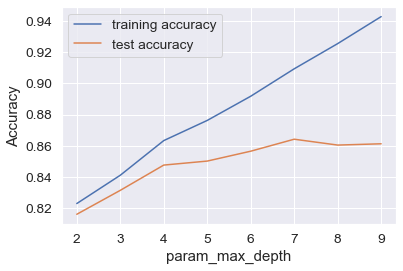

In [133]:
#Plot the graph for max_depth param
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("param_max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [134]:
##Grid Search CV for parameter min_samples_leaf
n_folds = 3
rfc = RandomForestClassifier(class_weight="balanced",random_state=42)
random_grid = {'min_samples_leaf': range(20,200)}
rf_random = GridSearchCV(rfc, random_grid,
                    cv=n_folds, 
                   scoring="roc_auc",return_train_score='warn')
rf_random.fit(df_train_pca, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
            

In [135]:
scores = rf_random.cv_results_
scores_results = pd.DataFrame(scores).head()
scores_results.sort_values(by="mean_test_score",ascending=False)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
3       0.793710      0.136788         0.016622        0.001244   
4       0.653921      0.016487         0.014960        0.001628   
2       0.570139      0.026265         0.013297        0.001243   
1       0.557846      0.018751         0.013629        0.000469   
0       0.603051      0.037831         0.012965        0.000814   

  param_min_samples_leaf                    params  split0_test_score  \
3                     23  {'min_samples_leaf': 23}           0.878737   
4                     24  {'min_samples_leaf': 24}           0.877133   
2                     22  {'min_samples_leaf': 22}           0.877264   
1                     21  {'min_samples_leaf': 21}           0.882352   
0                     20  {'min_samples_leaf': 20}           0.883298   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
3           0.875409           0.863240         0.872462        0.006661   
4           0.876692           0.860860         0.871562        0.007569   
2           0.875104           0.860887         0.871085        0.007264   
1           0.871745           0.857838         0.870645        0.010038   
0           0.869359           0.856558         0.869739        0.010920   

   rank_test_score  split0_train_score  split1_train_score  \
3               10            0.953071            0.951543   
4               22            0.951091            0.948647   
2               32            0.954768            0.952260   
1               41            0.956155            0.954330   
0               60            0.957915            0.955848   

   split2_train_score  mean_train_score  std_train_score  
3            0.957164          0.953926         0.002373  
4            0.955890          0.951876         0.003009  
2            0.957905          0.954977         0.002309  
1            0.960598          0.957028         0.002632  
0            0.961189          0.958317         0.002199

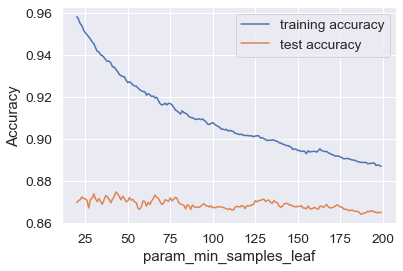

In [136]:
#Plot the graph for min_samples_leaf param
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("param_min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [137]:
#Grid search CV for min_samples_split param
n_folds = 3
rfc = RandomForestClassifier(class_weight="balanced",random_state=100)
random_grid = {'min_samples_split': range(20,200)}
rf_random = GridSearchCV(rfc, random_grid,
                    cv=n_folds, 
                   scoring="roc_auc",return_train_score='warn')
rf_random.fit(df_train_pca, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=100,
                                              verbose=0, warm_start=False),
           

In [138]:
scores = rf_random.cv_results_
scores_results = pd.DataFrame(scores).head()
scores_results.sort_values(by="mean_test_score",ascending=False)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
3       0.792212      0.112344         0.015958        0.000814   
4       0.799859      0.158109         0.017287        0.004179   
2       0.738024      0.053714         0.015625        0.001695   
0       0.781077      0.107078         0.014960        0.001410   
1       0.755318      0.088791         0.014960        0.000814   

  param_min_samples_split                     params  split0_test_score  \
3                      23  {'min_samples_split': 23}           0.864941   
4                      24  {'min_samples_split': 24}           0.861656   
2                      22  {'min_samples_split': 22}           0.864289   
0                      20  {'min_samples_split': 20}           0.866231   
1                      21  {'min_samples_split': 21}           0.858464   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
3           0.862873           0.847887         0.858567        0.007599   
4           0.858472           0.847315         0.855814        0.006149   
2           0.862120           0.840193         0.855534        0.010884   
0           0.855299           0.839887         0.853806        0.010807   
1           0.860961           0.839963         0.853129        0.009365   

   rank_test_score  split0_train_score  split1_train_score  \
3              174            0.989194            0.988955   
4              176            0.987969            0.987759   
2              178            0.989341            0.988528   
0              179            0.990648            0.990117   
1              180            0.990439            0.989175   

   split2_train_score  mean_train_score  std_train_score  
3            0.988154          0.988768         0.000445  
4            0.988709          0.988146         0.000407  
2            0.988707          0.988859         0.000349  
0            0.990753          0.990506         0.000278  
1            0.990261          0.989958         0.000559

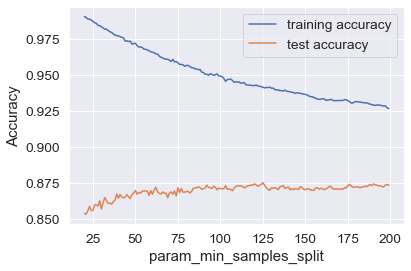

In [139]:
#Plot the graph for min_samples_leaf param
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("param_min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [140]:
#Grid search CV for n_estimators param
n_folds = 3
rfc = RandomForestClassifier(class_weight="balanced",random_state=42)
random_grid = {'n_estimators':[100,500,1000]}
rf_random = GridSearchCV(rfc, random_grid,cv=n_folds,scoring="roc_auc",return_train_score='warn',n_jobs=-1)
rf_random.fit(df_train_pca, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
            

In [141]:
scores = rf_random.cv_results_
scores_results = pd.DataFrame(scores).head()
scores_results.sort_values(by="mean_test_score",ascending=False)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
2     119.897246      3.617035         1.305845        0.189925   
1      73.064486      0.858731         0.986360        0.021713   
0      16.613460      0.531977         0.256336        0.051643   

  param_n_estimators                  params  split0_test_score  \
2               1000  {'n_estimators': 1000}           0.894744   
1                500   {'n_estimators': 500}           0.893605   
0                100   {'n_estimators': 100}           0.891876   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
2           0.892810           0.874415         0.887323        0.009161   
1           0.892291           0.873776         0.886558        0.009053   
0           0.885231           0.865503         0.880871        0.011200   

   rank_test_score  split0_train_score  split1_train_score  \
2                1                 1.0                 1.0   
1                2                 1.0                 1.0   
0                3                 1.0                 1.0   

   split2_train_score  mean_train_score  std_train_score  
2                 1.0               1.0              0.0  
1                 1.0               1.0              0.0  
0                 1.0               1.0              0.0

In [142]:
#Grid search CV with different parameters
param_grid = {
'max_depth': [6,10],
'min_samples_leaf': [30,40,75],
'n_estimators': [500,1000], 
'max_features': [15,25,40],
'min_samples_split':[25,40,50]
}
#Create a based model
rf = RandomForestClassifier(class_weight="balanced")
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1,verbose = 1,scoring='roc_auc')
# fit the grid search with the data
grid_search.fit(df_train_pca,y_train)
# optimal accuracy score and hyperparameters
print('Accuracy is',grid_search.best_score_,'using',grid_search.best_params_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 100.9min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed: 215.8min finished


Accuracy is 0.8904770428589548 using {'max_depth': 10, 'max_features': 25, 'min_samples_leaf': 30, 'min_samples_split': 25, 'n_estimators': 1000}


In [144]:
#Build RandomForest classifier on top of PCA
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             max_features=25,
                             n_estimators=1000,
                            min_samples_leaf=30,
                             min_samples_split=25,class_weight="balanced")
rfc.fit(df_train_pca,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features=25,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=30,
                       min_samples_split=25, min_weight_fraction_leaf=0.0,
                       n_estimators=1000, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [145]:
predictions = rfc.predict(df_test_pca)
prediction_proba= rfc.predict_proba(df_test_pca)

In [146]:
from sklearn.metrics import classification_report,confusion_matrix

In [147]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91      7647
           1       0.48      0.73      0.58      1242

    accuracy                           0.85      8889
   macro avg       0.72      0.80      0.75      8889
weighted avg       0.89      0.85      0.86      8889



In [148]:
print(confusion_matrix(y_test,predictions))
from sklearn.metrics import recall_score
print("Recall score: {}".format(recall_score(y_test,predictions)))

[[6676  971]
 [ 338  904]]
Recall score: 0.7278582930756844


In [149]:
print ('Accuracy Score for Random Forest Final Model :',metrics.accuracy_score(y_test, predictions))

Accuracy Score for Random Forest Final Model : 0.8527393407582405


In [150]:
from sklearn import metrics
"{:2.2}".format(metrics.roc_auc_score(y_test, prediction_proba[:,1]))

'0.88'

#### From the above reports, it can be seen that the Accuracy Score is: 85% Recall score is: 73% and AUC score: 88% for RandomForest model with PCA

### Model 3: AdaBoost

In [151]:
#Build a base estimator
shallow_tree = DecisionTreeClassifier(class_weight="balanced")

#### Hyperparamter tuning

In [153]:
#Build a ada boost model with the base estimator
ABC = AdaBoostClassifier(base_estimator=shallow_tree,algorithm="SAMME")
param_grid = {"base_estimator__max_depth" : [5,10],
              "n_estimators": [600,1000],
              "learning_rate":[0.01,1.5]
             }
grid_search = GridSearchCV(estimator=ABC, param_grid=param_grid, n_jobs=-1, cv=3, scoring='roc_auc')    
grid_search.fit(df_train_pca,y_train)
# optimal accuracy score and hyperparameters
print('Accuracy is',grid_search.best_score_,'using',grid_search.best_params_)

Accuracy is 0.8826423559163543 using {'base_estimator__max_depth': 10, 'learning_rate': 0.01, 'n_estimators': 600}


In [155]:
#Re-build model with the values obtained after tuning the parameters.
shallow_tree = DecisionTreeClassifier(max_depth=10,class_weight="balanced")
ABC = AdaBoostClassifier(base_estimator=shallow_tree,n_estimators=600,algorithm="SAMME",learning_rate=0.01)
ABC.fit(df_train_pca, y_train)
y_pred = ABC.predict(df_test_pca)
score = metrics.accuracy_score(y_test, y_pred)
print("Accuracy score is: ", score)
from sklearn import metrics
predictions = ABC.predict_proba(df_test_pca)
"{:2.2}".format(metrics.roc_auc_score(y_test, predictions[:,1]))

Accuracy score is:  0.8725390932613343


'0.87'

In [156]:
#View the classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93      7647
           1       0.54      0.62      0.58      1242

    accuracy                           0.87      8889
   macro avg       0.74      0.77      0.75      8889
weighted avg       0.88      0.87      0.88      8889



In [157]:
from sklearn.metrics import recall_score
print("Recall score: {}".format(recall_score(y_test,y_pred)))

Recall score: 0.6175523349436393


#### From the above reports, the AUC score is 87% Accuracy is 87% and Recall is 62% for the AdaBoost model with PCA.

#### Given all the models, logistic regression with PCA gives better accuracy and recall scores. Hence that can be considered for prediction.

### Model without PCA using LogisticRegression

In [158]:
from sklearn.preprocessing import scale
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns
X.describe()

circle_id        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count    29629.0  2.962900e+04  2.962900e+04  2.962900e+04  2.962900e+04   
mean         0.0  1.474364e-16  7.927327e-17  1.469980e-16 -9.750283e-17   
std          0.0  1.000017e+00  1.000017e+00  1.000017e+00  1.000017e+00   
min          0.0 -7.456205e+00 -6.838067e+00 -2.105386e+00 -5.876947e-01   
25%          0.0 -6.361911e-01 -6.426987e-01 -6.685921e-01 -5.422615e-01   
50%          0.0 -1.818927e-01 -1.867925e-01 -1.789823e-01 -3.790042e-01   
75%          0.0  3.905813e-01  3.853114e-01  3.985394e-01  6.607871e-02   
max          0.0  1.052896e+01  1.113330e+01  1.079978e+01  1.522845e+01   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  2.962900e+04  2.962900e+04  2.962900e+04  2.962900e+04  2.962900e+04   
mean  -6.556270e-17 -1.550917e-17 -6.225777e-17 -7.357396e-17 -1.360153e-16   
std    1.000017e+00  1.000017e+00  1.000017e+00  1.000017e+00  1.000017e+00   
min   -5.847065e-01 -5.474638e-01 -7.926467e-01 -7.769449e-01 -7.367061e-01   
25%   -5.430057e-01 -5.111155e-01 -6.213618e-01 -6.153920e-01 -5.987591e-01   
50%   -3.855696e-01 -3.595826e-01 -3.215603e-01 -3.252911e-01 -3.377605e-01   
75%    5.175065e-02  9.458948e-03  2.382825e-01  2.360156e-01  2.184175e-01   
max    1.564745e+01  1.572309e+01  1.342703e+01  1.369006e+01  1.555705e+01   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   2.962900e+04   2.962900e+04   2.962900e+04   2.962900e+04   
mean    5.011666e-16   3.592646e-16   1.294357e-15   1.842796e-16   
std     1.000017e+00   1.000017e+00   1.000017e+00   1.000017e+00   
min    -2.381891e-01  -1.928816e-01  -2.291976e-01  -2.476303e-01   
25%    -2.381891e-01  -1.928816e-01  -2.291976e-01  -2.476303e-01   
50%    -2.381891e-01  -1.928816e-01  -2.291976e-01  -2.476303e-01   
75%    -2.381891e-01  -1.928816e-01  -2.291976e-01  -2.476303e-01   
max     3.376668e+01   4.930091e+01   5.470400e+01   3.212863e+01   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   2.962900e+04   2.962900e+04      2.962900e+04      2.962900e+04   
mean    1.725382e-16  -3.376140e-16     -8.540350e-17      1.361015e-16   
std     1.000017e+00   1.000017e+00      1.000017e+00      1.000017e+00   
min    -2.318712e-01  -2.377312e-01     -4.113645e-01     -4.108061e-01   
25%    -2.318712e-01  -2.377312e-01     -3.858773e-01     -3.839303e-01   
50%    -2.318712e-01  -2.377312e-01     -2.810639e-01     -2.809544e-01   
75%    -2.318712e-01  -2.377312e-01      3.373983e-03      3.312837e-03   
max     2.891994e+01   5.097959e+01      1.966940e+01      1.837376e+01   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
count      2.962900e+04      2.962900e+04      2.962900e+04      2.962900e+04   
mean      -3.026331e-17     -2.095631e-16     -9.582788e-17     -4.390719e-16   
std        1.000017e+00      1.000017e+00      1.000017e+00      1.000017e+00   
min       -4.262289e-01     -6.798572e-01     -6.963494e-01     -6.871175e-01   
25%       -4.032036e-01     -5.896560e-01     -5.960748e-01     -6.030947e-01   
50%       -2.896120e-01     -3.362358e-01     -3.393583e-01     -3.286379e-01   
75%        4.475793e-02      1.816892e-01      1.831831e-01      1.778693e-01   
max        2.060774e+01      1.606953e+01      1.527026e+01      1.488445e+01   

       loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  \
count      2.962900e+04      2.962900e+04      2.962900e+04      2.962900e+04   
mean      -1.303647e-16     -1.951181e-16     -1.360536e-15     -5.010374e-16   
std        1.000017e+00      1.000017e+00      1.000017e+00      1.000017e+00   
min       -3.144865e-01     -3.185574e-01     -3.536441e-01     -2.139287e-01   
25%       -3.144865e-01     -3.185574e-01     -3.536441e-01     -2.139287e-01   
50%       -3.062169e-01     -3.084076e-01     -3.453415e-01     -2.139287e-01   
75%       -1.36

In [159]:
X_train, X_test = train_test_split(X, train_size = 0.7, test_size = 0.3, random_state = 100)
y_train, y_test = train_test_split(y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [160]:
logreg = LogisticRegression(class_weight="balanced")
rfe = RFE(logreg, 30)            
rfe = rfe.fit(X_train,y_train)
print(rfe.support_)           
print(rfe.ranking_)

[False False False False False  True False  True False False False False
 False False False False False False  True  True False  True False  True
  True False False  True  True False  True  True  True False False False
 False False False  True False  True  True False False  True False False
 False False False  True False  True False  True  True False False False
 False False False False False False False False False  True False False
 False False False False False False False False  True  True False False
 False False  True  True False  True  True False False False False False
 False False False  True False False False False False  True False False
 False False False False False False False False False False False False
 False False False False  True False False False False]
[100  92  22  99  50   1  10   1  30  11  37  24  91  77  16   8  97  26
   1   1  43   1  28   1   1  31  42   1   1  72   1   1   1  36  74  67
   9  40  39   1  27   1   1  71  44   1  78  73  12  45  89   1  96

In [161]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))
#X_train = pd.DataFrame(X_train)
rfe_columns = X_train.columns[rfe.support_]
X_train_rfe = X_train[rfe_columns]
X_test = pd.DataFrame(X_test)
X_test_rfe = X_test[rfe_columns]

In [162]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features           VIF
13    std_og_t2c_mou_7           inf
22    std_ic_t2o_mou_8           inf
21    std_ic_t2o_mou_7           inf
14    std_og_t2c_mou_8           inf
9         loc_og_mou_8  3.200390e+09
4     loc_og_t2m_mou_8  1.477835e+09
2     loc_og_t2t_mou_8  1.040579e+09
6     loc_og_t2f_mou_8  2.873270e+07
26        spl_ic_mou_8  6.224293e+04
25        spl_ic_mou_7  6.761100e+03
18      total_og_mou_6  7.589000e+01
17         og_others_7  3.884000e+01
1         offnet_mou_6  3.583000e+01
8         loc_og_mou_6  3.054000e+01
10    std_og_t2t_mou_6  3.044000e+01
0          onnet_mou_7  2.131000e+01
11    std_og_t2t_mou_7  1.843000e+01
7     loc_og_t2c_mou_8  1.780000e+01
3     loc_og_t2m_mou_6  1.593000e+01
24      total_ic_mou_8  8.700000e+00
20        loc_ic_mou_8  7.220000e+00
12    std_og_t2f_mou_8  6.230000e+00
19      total_og_mou_7  6.200000e+00
5     loc_og_t2f_mou_7  4.920000e+00
16        spl_og_mou_8  3.440000e+00
23      total_ic_mou_7  3.410000e+00
15        std_og_mou_8  2.910000e+00
27    total_rech_num_8  1.370000e+00
28  last_day_rch_amt_8  1.180000e+00
29                 aon  1.150000e+00

In [163]:
X_train_rfe.drop(['std_og_t2c_mou_7'],axis=1,inplace=True)
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features           VIF
21    std_ic_t2o_mou_8           inf
13    std_og_t2c_mou_8           inf
9         loc_og_mou_8  3.200390e+09
4     loc_og_t2m_mou_8  1.477835e+09
2     loc_og_t2t_mou_8  1.040579e+09
6     loc_og_t2f_mou_8  2.873270e+07
25        spl_ic_mou_8  6.224293e+04
20    std_ic_t2o_mou_7  6.793580e+03
24        spl_ic_mou_7  6.761100e+03
17      total_og_mou_6  7.589000e+01
16         og_others_7  3.884000e+01
1         offnet_mou_6  3.583000e+01
8         loc_og_mou_6  3.054000e+01
10    std_og_t2t_mou_6  3.044000e+01
0          onnet_mou_7  2.131000e+01
11    std_og_t2t_mou_7  1.843000e+01
7     loc_og_t2c_mou_8  1.780000e+01
3     loc_og_t2m_mou_6  1.593000e+01
23      total_ic_mou_8  8.700000e+00
19        loc_ic_mou_8  7.220000e+00
12    std_og_t2f_mou_8  6.230000e+00
18      total_og_mou_7  6.200000e+00
5     loc_og_t2f_mou_7  4.920000e+00
15        spl_og_mou_8  3.440000e+00
22      total_ic_mou_7  3.410000e+00
14        std_og_mou_8  2.910000e+00
26    total_rech_num_8  1.370000e+00
27  last_day_rch_amt_8  1.180000e+00
28                 aon  1.150000e+00

In [164]:
X_train_rfe.drop(['std_ic_t2o_mou_8'],axis=1,inplace=True)
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features           VIF
9         loc_og_mou_8  3.200390e+09
4     loc_og_t2m_mou_8  1.477835e+09
2     loc_og_t2t_mou_8  1.040579e+09
13    std_og_t2c_mou_8  7.577455e+07
6     loc_og_t2f_mou_8  2.873270e+07
24        spl_ic_mou_8  6.224293e+04
20    std_ic_t2o_mou_7  6.793580e+03
23        spl_ic_mou_7  6.761100e+03
17      total_og_mou_6  7.589000e+01
16         og_others_7  3.884000e+01
1         offnet_mou_6  3.583000e+01
8         loc_og_mou_6  3.054000e+01
10    std_og_t2t_mou_6  3.044000e+01
0          onnet_mou_7  2.131000e+01
11    std_og_t2t_mou_7  1.843000e+01
7     loc_og_t2c_mou_8  1.780000e+01
3     loc_og_t2m_mou_6  1.593000e+01
22      total_ic_mou_8  8.700000e+00
19        loc_ic_mou_8  7.220000e+00
12    std_og_t2f_mou_8  6.230000e+00
18      total_og_mou_7  6.200000e+00
5     loc_og_t2f_mou_7  4.920000e+00
15        spl_og_mou_8  3.440000e+00
21      total_ic_mou_7  3.410000e+00
14        std_og_mou_8  2.910000e+00
25    total_rech_num_8  1.370000e+00
26  last_day_rch_amt_8  1.180000e+00
27                 aon  1.150000e+00

In [165]:
X_train_rfe.drop(['loc_og_mou_8'],axis=1,inplace=True)
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features       VIF
12    std_og_t2c_mou_8  62266.97
23        spl_ic_mou_8  62242.26
19    std_ic_t2o_mou_7   6791.99
22        spl_ic_mou_7   6759.47
16      total_og_mou_6     75.86
15         og_others_7     38.83
1         offnet_mou_6     35.80
8         loc_og_mou_6     30.54
9     std_og_t2t_mou_6     30.42
0          onnet_mou_7     21.31
10    std_og_t2t_mou_7     18.43
7     loc_og_t2c_mou_8     17.80
3     loc_og_t2m_mou_6     15.92
21      total_ic_mou_8      8.69
18        loc_ic_mou_8      7.22
6     loc_og_t2f_mou_8      7.05
11    std_og_t2f_mou_8      6.22
17      total_og_mou_7      6.20
5     loc_og_t2f_mou_7      4.92
14        spl_og_mou_8      3.44
20      total_ic_mou_7      3.41
2     loc_og_t2t_mou_8      3.17
13        std_og_mou_8      2.88
4     loc_og_t2m_mou_8      2.51
24    total_rech_num_8      1.37
25  last_day_rch_amt_8      1.18
26                 aon      1.13

In [166]:
X_train_rfe.drop(['std_og_t2c_mou_8'],axis=1,inplace=True)
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
18    std_ic_t2o_mou_7  6781.15
21        spl_ic_mou_7  6748.54
15      total_og_mou_6    75.85
14         og_others_7    38.83
1         offnet_mou_6    35.80
8         loc_og_mou_6    30.54
9     std_og_t2t_mou_6    30.42
22        spl_ic_mou_8    23.91
0          onnet_mou_7    21.30
10    std_og_t2t_mou_7    18.42
7     loc_og_t2c_mou_8    17.79
3     loc_og_t2m_mou_6    15.92
20      total_ic_mou_8     8.68
17        loc_ic_mou_8     7.21
6     loc_og_t2f_mou_8     7.05
11    std_og_t2f_mou_8     6.22
16      total_og_mou_7     6.20
5     loc_og_t2f_mou_7     4.92
13        spl_og_mou_8     3.44
19      total_ic_mou_7     3.41
2     loc_og_t2t_mou_8     3.17
12        std_og_mou_8     2.88
4     loc_og_t2m_mou_8     2.51
23    total_rech_num_8     1.36
24  last_day_rch_amt_8     1.18
25                 aon     1.13

In [167]:
X_train_rfe.drop(['std_ic_t2o_mou_7'],axis=1,inplace=True)
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
15      total_og_mou_6  75.85
14         og_others_7  38.66
1         offnet_mou_6  35.79
20        spl_ic_mou_7  32.93
8         loc_og_mou_6  30.54
9     std_og_t2t_mou_6  30.41
21        spl_ic_mou_8  23.91
0          onnet_mou_7  21.30
10    std_og_t2t_mou_7  18.42
7     loc_og_t2c_mou_8  17.79
3     loc_og_t2m_mou_6  15.92
19      total_ic_mou_8   8.68
17        loc_ic_mou_8   7.21
6     loc_og_t2f_mou_8   7.05
11    std_og_t2f_mou_8   6.22
16      total_og_mou_7   6.19
5     loc_og_t2f_mou_7   4.92
13        spl_og_mou_8   3.44
18      total_ic_mou_7   3.41
2     loc_og_t2t_mou_8   3.17
12        std_og_mou_8   2.88
4     loc_og_t2m_mou_8   2.51
22    total_rech_num_8   1.36
23  last_day_rch_amt_8   1.18
24                 aon   1.13

In [168]:
X_train_rfe.drop(['total_og_mou_6'],axis=1,inplace=True)
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
14         og_others_7  38.51
19        spl_ic_mou_7  32.82
20        spl_ic_mou_8  23.91
0          onnet_mou_7  20.85
10    std_og_t2t_mou_7  18.28
7     loc_og_t2c_mou_8  17.79
18      total_ic_mou_8   8.67
8         loc_og_mou_6   7.72
16        loc_ic_mou_8   7.20
6     loc_og_t2f_mou_8   7.04
3     loc_og_t2m_mou_6   6.71
11    std_og_t2f_mou_8   6.22
15      total_og_mou_7   6.10
5     loc_og_t2f_mou_7   4.86
13        spl_og_mou_8   3.44
17      total_ic_mou_7   3.41
2     loc_og_t2t_mou_8   3.16
12        std_og_mou_8   2.88
1         offnet_mou_6   2.64
4     loc_og_t2m_mou_8   2.49
9     std_og_t2t_mou_6   2.32
21    total_rech_num_8   1.36
22  last_day_rch_amt_8   1.18
23                 aon   1.13

In [169]:
X_train_rfe.drop(['og_others_7'],axis=1,inplace=True)
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
19        spl_ic_mou_8  23.31
0          onnet_mou_7  20.85
10    std_og_t2t_mou_7  18.28
7     loc_og_t2c_mou_8  17.77
17      total_ic_mou_8   8.67
8         loc_og_mou_6   7.72
15        loc_ic_mou_8   7.20
3     loc_og_t2m_mou_6   6.71
11    std_og_t2f_mou_8   6.22
6     loc_og_t2f_mou_8   6.17
14      total_og_mou_7   6.10
5     loc_og_t2f_mou_7   3.84
13        spl_og_mou_8   3.43
16      total_ic_mou_7   3.41
2     loc_og_t2t_mou_8   3.16
12        std_og_mou_8   2.88
18        spl_ic_mou_7   2.82
1         offnet_mou_6   2.64
4     loc_og_t2m_mou_8   2.49
9     std_og_t2t_mou_6   2.32
20    total_rech_num_8   1.36
21  last_day_rch_amt_8   1.18
22                 aon   1.13

In [170]:
X_train_rfe.drop(['spl_ic_mou_8'],axis=1,inplace=True)
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0          onnet_mou_7  20.85
10    std_og_t2t_mou_7  18.28
7     loc_og_t2c_mou_8   9.24
17      total_ic_mou_8   8.54
8         loc_og_mou_6   7.72
15        loc_ic_mou_8   7.15
3     loc_og_t2m_mou_6   6.71
14      total_og_mou_7   6.10
6     loc_og_t2f_mou_8   5.23
11    std_og_t2f_mou_8   4.87
5     loc_og_t2f_mou_7   3.48
16      total_ic_mou_7   3.40
13        spl_og_mou_8   3.39
2     loc_og_t2t_mou_8   3.16
12        std_og_mou_8   2.88
1         offnet_mou_6   2.64
18        spl_ic_mou_7   2.57
4     loc_og_t2m_mou_8   2.49
9     std_og_t2t_mou_6   2.32
19    total_rech_num_8   1.36
20  last_day_rch_amt_8   1.17
21                 aon   1.13

In [171]:
X_train_rfe.drop(['onnet_mou_7'],axis=1,inplace=True)
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
6     loc_og_t2c_mou_8  9.24
16      total_ic_mou_8  8.54
14        loc_ic_mou_8  7.14
7         loc_og_mou_6  5.94
2     loc_og_t2m_mou_6  5.93
13      total_og_mou_7  5.46
5     loc_og_t2f_mou_8  5.23
10    std_og_t2f_mou_8  4.86
9     std_og_t2t_mou_7  4.40
4     loc_og_t2f_mou_7  3.47
15      total_ic_mou_7  3.40
12        spl_og_mou_8  3.39
11        std_og_mou_8  2.82
17        spl_ic_mou_7  2.56
0         offnet_mou_6  2.56
3     loc_og_t2m_mou_8  2.46
8     std_og_t2t_mou_6  2.32
1     loc_og_t2t_mou_8  2.17
18    total_rech_num_8  1.36
19  last_day_rch_amt_8  1.17
20                 aon  1.13

In [172]:
X_train_rfe.drop(['loc_og_t2c_mou_8'],axis=1,inplace=True)
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
15      total_ic_mou_8  8.46
13        loc_ic_mou_8  7.11
6         loc_og_mou_6  5.94
2     loc_og_t2m_mou_6  5.93
12      total_og_mou_7  5.46
8     std_og_t2t_mou_7  4.40
5     loc_og_t2f_mou_8  4.30
9     std_og_t2f_mou_8  3.66
14      total_ic_mou_7  3.40
4     loc_og_t2f_mou_7  3.06
10        std_og_mou_8  2.82
0         offnet_mou_6  2.56
3     loc_og_t2m_mou_8  2.46
7     std_og_t2t_mou_6  2.32
16        spl_ic_mou_7  2.28
11        spl_og_mou_8  2.23
1     loc_og_t2t_mou_8  2.17
17    total_rech_num_8  1.36
18  last_day_rch_amt_8  1.16
19                 aon  1.13

In [173]:
X_train_rfe.drop(['total_ic_mou_8'],axis=1,inplace=True)
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
6         loc_og_mou_6  5.93
2     loc_og_t2m_mou_6  5.91
12      total_og_mou_7  5.41
8     std_og_t2t_mou_7  4.40
5     loc_og_t2f_mou_8  4.28
9     std_og_t2f_mou_8  3.66
4     loc_og_t2f_mou_7  3.05
13        loc_ic_mou_8  2.95
10        std_og_mou_8  2.76
14      total_ic_mou_7  2.73
0         offnet_mou_6  2.55
3     loc_og_t2m_mou_8  2.44
7     std_og_t2t_mou_6  2.32
15        spl_ic_mou_7  2.27
11        spl_og_mou_8  2.22
1     loc_og_t2t_mou_8  2.17
16    total_rech_num_8  1.36
17  last_day_rch_amt_8  1.15
18                 aon  1.13

In [174]:
X_train_rfe.drop(['loc_og_mou_6'],axis=1,inplace=True)
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
11      total_og_mou_7  5.25
7     std_og_t2t_mou_7  4.35
5     loc_og_t2f_mou_8  4.28
8     std_og_t2f_mou_8  3.65
4     loc_og_t2f_mou_7  3.03
12        loc_ic_mou_8  2.95
9         std_og_mou_8  2.73
13      total_ic_mou_7  2.73
0         offnet_mou_6  2.54
2     loc_og_t2m_mou_6  2.52
3     loc_og_t2m_mou_8  2.41
6     std_og_t2t_mou_6  2.32
14        spl_ic_mou_7  2.26
10        spl_og_mou_8  2.22
1     loc_og_t2t_mou_8  1.43
15    total_rech_num_8  1.35
16  last_day_rch_amt_8  1.15
17                 aon  1.12

In [175]:
X_train_rfe.drop(['total_og_mou_7'],axis=1,inplace=True)
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
5     loc_og_t2f_mou_8  4.26
8     std_og_t2f_mou_8  3.65
4     loc_og_t2f_mou_7  3.01
7     std_og_t2t_mou_7  2.96
11        loc_ic_mou_8  2.89
12      total_ic_mou_7  2.62
2     loc_og_t2m_mou_6  2.50
9         std_og_mou_8  2.33
6     std_og_t2t_mou_6  2.30
3     loc_og_t2m_mou_8  2.26
13        spl_ic_mou_7  2.23
10        spl_og_mou_8  2.22
0         offnet_mou_6  1.76
14    total_rech_num_8  1.35
15  last_day_rch_amt_8  1.15
16                 aon  1.12
1     loc_og_t2t_mou_8  1.11

In [176]:
# Cross validation with 'C' param for logistic regression
learner_pca = LogisticRegression(class_weight="balanced")
params = {'C': [0.1,0.5,1.0,10,100]}
folds = 3
model_cv = GridSearchCV(estimator = learner_pca, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.8s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 0.5, 1.0, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [177]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.sort_values(by="mean_test_score",ascending=False)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
3       0.055518      0.006112         0.001330        0.000470      10   
4       0.055520      0.012224         0.000996        0.000002     100   
2       0.061835      0.024033         0.001330        0.000470       1   
1       0.057513      0.006220         0.001662        0.000470     0.5   
0       0.057513      0.007566         0.001330        0.000470     0.1   

       params  split0_test_score  split1_test_score  split2_test_score  \
3   {'C': 10}          -0.227220          -0.218863          -0.213655   
4  {'C': 100}          -0.227220          -0.218863          -0.213655   
2  {'C': 1.0}          -0.227943          -0.218863          -0.213366   
1  {'C': 0.5}          -0.228233          -0.219152          -0.213366   
0  {'C': 0.1}          -0.228811          -0.220888          -0.213366   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
3        -0.219913        0.005587                1           -0.224360   
4        -0.219913        0.005587                1           -0.224360   
2        -0.220058        0.006011                3           -0.224288   
1        -0.220251        0.006119                4           -0.224360   
0        -0.221022        0.006306                5           -0.224722   

   split1_train_score  split2_train_score  mean_train_score  std_train_score  
3           -0.220511           -0.208071         -0.217647         0.006951  
4           -0.220511           -0.208071         -0.217647         0.006951  
2           -0.220438           -0.207999         -0.217575         0.006951  
1           -0.220438           -0.208288         -0.217695         0.006842  
0           -0.220655           -0.208867         -0.218081         0.006724

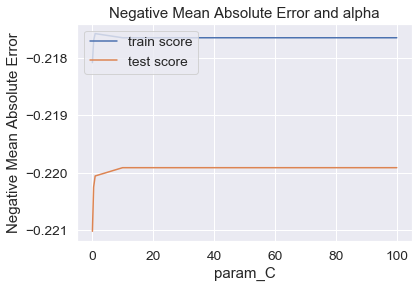

In [178]:
cv_results['param_C'] = cv_results['param_C'].astype('float32')

# plotting the graph with the value of hyperparameter C chosen
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.xlabel('param_C')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score','test score'], loc='upper left')
plt.show()

In [179]:
#Build model with param_C value after tuning the hyperparameter
lgr = LogisticRegression(C=10,class_weight="balanced")

In [180]:
lgr_model = lgr.fit(X_train_rfe, y_train)

In [181]:
rfe_columns = X_train_rfe.columns
X_train_rfe = X_train[rfe_columns]
X_test_rfe = X_test[rfe_columns]
pred_probs_test = lgr_model.predict_proba(X_test_rfe)
prediction_logistic=lgr_model.predict(X_test_rfe)

In [182]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,prediction_logistic))

              precision    recall  f1-score   support

           0       0.96      0.77      0.85      7647
           1       0.36      0.81      0.50      1242

    accuracy                           0.77      8889
   macro avg       0.66      0.79      0.68      8889
weighted avg       0.88      0.77      0.81      8889



In [183]:
from sklearn import metrics
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.87'

In [184]:
print(confusion_matrix(y_test,prediction_logistic))
from sklearn.metrics import recall_score
print("Recall score: {}".format(recall_score(y_test,prediction_logistic)))

[[5879 1768]
 [ 233 1009]]
Recall score: 0.8123993558776168


In [185]:
print ('Accuracy Score for Logistic Regression Final Model :',metrics.accuracy_score(y_test, prediction_logistic))

Accuracy Score for Logistic Regression Final Model : 0.7748903138710767


#### From the above, Accuracy for logistic is 77% Recall is 81% and ROC_AUC score is 87%

In [186]:
column_labels = X_train_rfe.columns.tolist()
coef = lgr_model.coef_.squeeze().tolist()

# Zip together
labels_coef = list(zip(column_labels, coef))

# Verify the result
print(labels_coef)

[('offnet_mou_6', 0.2089722100282098), ('loc_og_t2t_mou_8', -0.24084423963677618), ('loc_og_t2m_mou_6', -0.0018453392321078964), ('loc_og_t2m_mou_8', -1.2478595876312695), ('loc_og_t2f_mou_7', -0.25286114696549516), ('loc_og_t2f_mou_8', 0.24160184699400988), ('std_og_t2t_mou_6', 0.07198380861511386), ('std_og_t2t_mou_7', 0.1618019026154482), ('std_og_t2f_mou_8', 0.3890805729002687), ('std_og_mou_8', -0.6585755510680775), ('spl_og_mou_8', 0.10788625912437062), ('loc_ic_mou_8', -1.0038808077178505), ('total_ic_mou_7', 0.2780981776625062), ('spl_ic_mou_7', 0.36084354962788306), ('total_rech_num_8', -0.5423965158746107), ('last_day_rch_amt_8', -0.2662557906114545), ('aon', -0.3066830132462224)]


In [187]:
s=pd.Series(lgr_model.coef_[0], index=X_train_rfe.columns)
s.sort_values(ascending=False)

std_og_t2f_mou_8      0.389081
spl_ic_mou_7          0.360844
total_ic_mou_7        0.278098
loc_og_t2f_mou_8      0.241602
offnet_mou_6          0.208972
std_og_t2t_mou_7      0.161802
spl_og_mou_8          0.107886
std_og_t2t_mou_6      0.071984
loc_og_t2m_mou_6     -0.001845
loc_og_t2t_mou_8     -0.240844
loc_og_t2f_mou_7     -0.252861
last_day_rch_amt_8   -0.266256
aon                  -0.306683
total_rech_num_8     -0.542397
std_og_mou_8         -0.658576
loc_ic_mou_8         -1.003881
loc_og_t2m_mou_8     -1.247860
dtype: float64

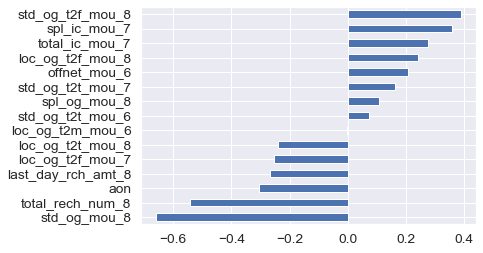

In [188]:
importances = lgr_model.coef_[0]
weights = pd.Series(importances,
                 index=X_train_rfe.columns.values)
weights.sort_values()[-15:].plot(kind = 'barh')

#### From the above results, it can be observed that, local outgoing , local incoming, std outgoing, total number of recharges and age on network are important factors for churn. 

### Strategies that the company can adopt to retain the customers are like:
- Monitoring the usage of the customers for incoming and outgoing local and std calls and if they see a drop in usage they can contact the customers to see if they are having any issues with the network. Basically they should focus on those customers immediately as they are more likely to churn. They can provide some good offers to the customers.

- The outging call duration is a key factor as the customer is more likely to churn as per our analysis done above. May be these customers did not like the outgoing services offered to them or may be the call tariffs seemed expensive to them or may be the overall call quality, network coverage was not liked my them. The operator must do some deep dive study to understand what could have let to the drop in outgoing call duration and work towards that so that the customer does not churn.

- It is very important for the company to keep the 2-3 years old customers happy. They should do surveys every quarterly and take feedback from these customers and try to improve based on that. By this they can get to know the unhappy customers.

- Total number of recharges in the last month is an important factor which needs to be considered.